In [17]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
import pandas as pd
df = pd.read_csv('term-deposit-marketing-2020.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [3]:
df.shape

(40000, 14)

In [4]:
df[df['y']=='no'].shape

(37104, 14)

In [5]:
df[df['y']=='yes'].shape

(2896, 14)

- The dataset is imblanaced.

In [6]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


### Exploratory Data Analysis.

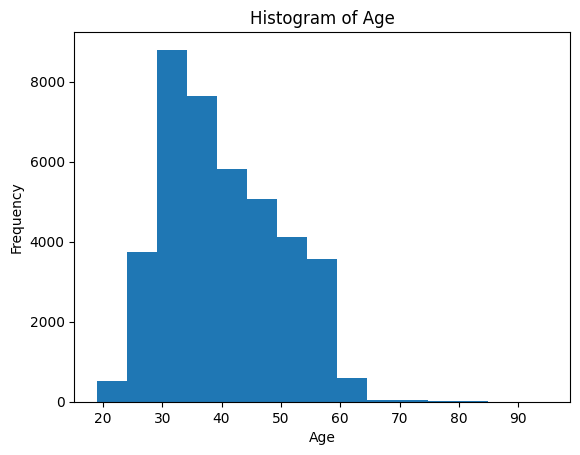

In [8]:
import matplotlib.pyplot as plt
plt.hist(df['age'],bins=15)

plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')
plt.show()

- We can observe that largest age range for customers is 30-40 years.

In [9]:
job_category = df['job'].value_counts()
job_category

job
blue-collar      9383
management       8166
technician       6852
admin            4483
services         3910
retired          1437
self-employed    1414
entrepreneur     1405
unemployed       1104
housemaid        1087
student           524
unknown           235
Name: count, dtype: int64

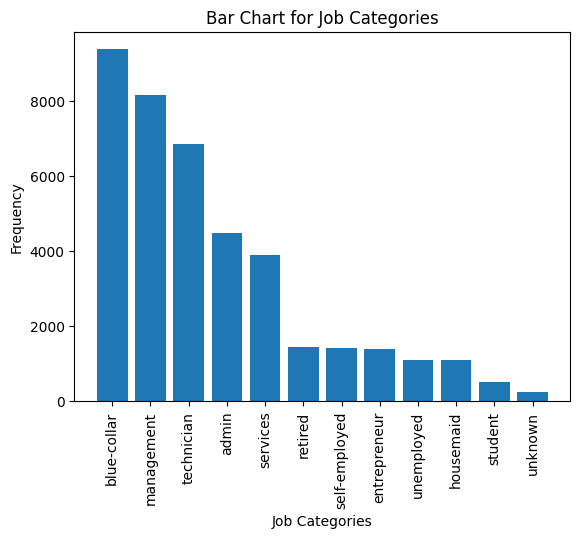

In [10]:
plt.bar(job_category.index,job_category.values)
plt.xlabel('Job Categories')
plt.ylabel('Frequency')
plt.title('Bar Chart for Job Categories')
plt.xticks(rotation=90)
plt.show()

- We can see that most of the jobs represented are blue-collar, management, technician, admin and services.

In [11]:
marital_category = df['marital'].value_counts()
marital_category

marital
married     24386
single      10889
divorced     4725
Name: count, dtype: int64

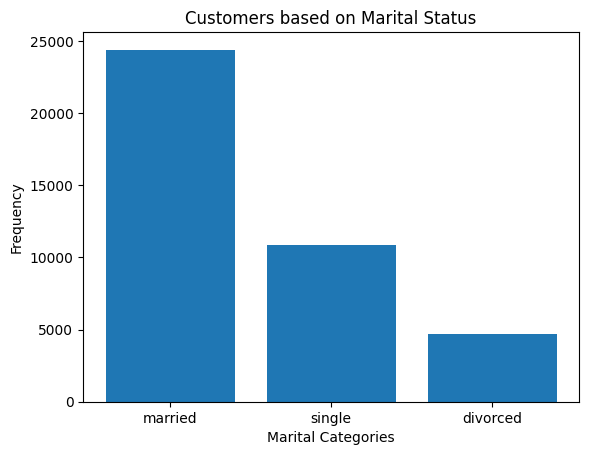

In [12]:
plt.bar(marital_category.index,marital_category.values)
plt.xlabel('Marital Categories')
plt.ylabel('Frequency')
plt.title('Customers based on Marital Status')
plt.show()

- Most of the customers are married.

In [13]:
education_category = df['education'].value_counts()
education_category

education
secondary    20993
tertiary     11206
primary       6270
unknown       1531
Name: count, dtype: int64

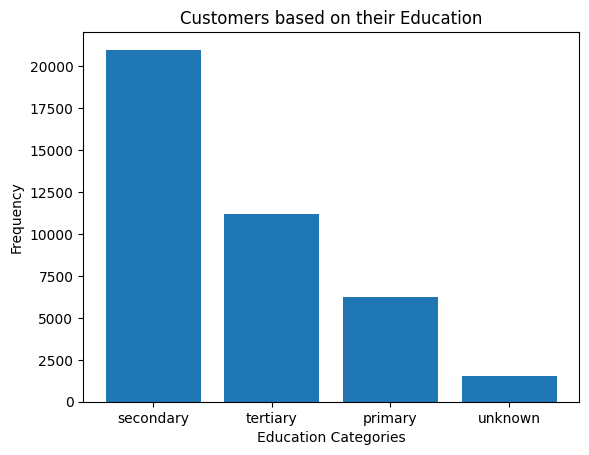

In [14]:
plt.bar(education_category.index,education_category.values)
plt.xlabel('Education Categories')
plt.ylabel('Frequency')
plt.title('Customers based on their Education')
plt.show()

- Most of the customers have secondary education.

In [15]:
default_category = df['default'].value_counts()
default_category

default
no     39191
yes      809
Name: count, dtype: int64

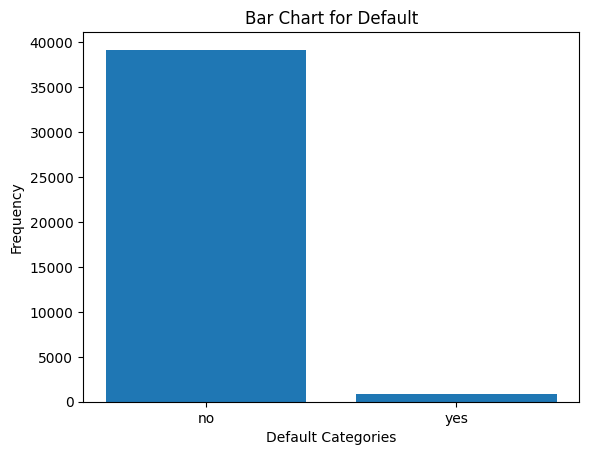

In [16]:
plt.bar(default_category.index,default_category.values)
plt.xlabel('Default Categories')
plt.ylabel('Frequency')
plt.title('Bar Chart for Default')
plt.show()

- Most of the customers have no credit in default.

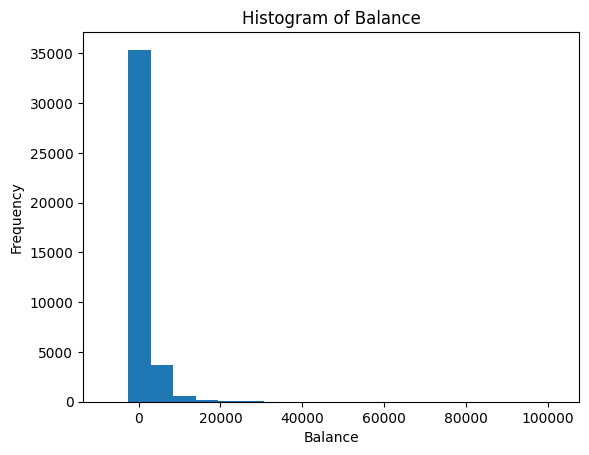

In [17]:
plt.hist(df['balance'],bins=20)

plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Histogram of Balance')
plt.show()

(array([9.0000e+00, 3.5354e+04, 3.7280e+03, 5.8900e+02, 1.5600e+02,
        9.0000e+01, 3.3000e+01, 1.1000e+01, 9.0000e+00, 9.0000e+00,
        3.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00]),
 array([ -8019. ,  -2511.7,   2995.6,   8502.9,  14010.2,  19517.5,
         25024.8,  30532.1,  36039.4,  41546.7,  47054. ,  52561.3,
         58068.6,  63575.9,  69083.2,  74590.5,  80097.8,  85605.1,
         91112.4,  96619.7, 102127. ]))

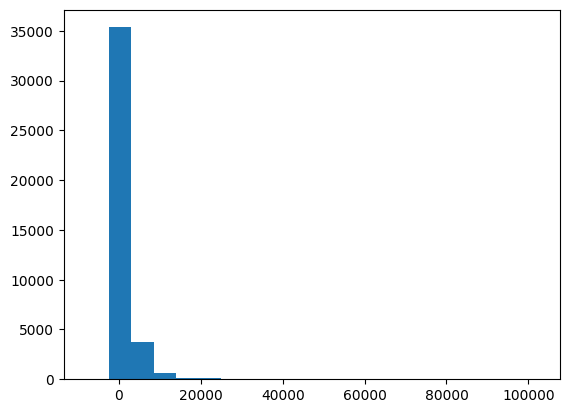

In [18]:
counts, bin_edges, patches = plt.hist(df['balance'], bins=20)
counts, bin_edges

In [19]:
import numpy as np

# Calculate the bin ranges
bin_ranges = [(bin_edges[i], bin_edges[i+1]) for i in range(len(bin_edges) - 1)]
bin_ranges

[(-8019.0, -2511.7),
 (-2511.7, 2995.6000000000004),
 (2995.6000000000004, 8502.900000000001),
 (8502.900000000001, 14010.2),
 (14010.2, 19517.5),
 (19517.5, 25024.800000000003),
 (25024.800000000003, 30532.1),
 (30532.1, 36039.4),
 (36039.4, 41546.700000000004),
 (41546.700000000004, 47054.0),
 (47054.0, 52561.3),
 (52561.3, 58068.600000000006),
 (58068.600000000006, 63575.90000000001),
 (63575.90000000001, 69083.2),
 (69083.2, 74590.5),
 (74590.5, 80097.8),
 (80097.8, 85605.1),
 (85605.1, 91112.40000000001),
 (91112.40000000001, 96619.7),
 (96619.7, 102127.0)]

- Most of the balances are between -2500 and 3000 euros.

In [20]:
housing_category = df['housing'].value_counts()
housing_category

housing
yes    24031
no     15969
Name: count, dtype: int64

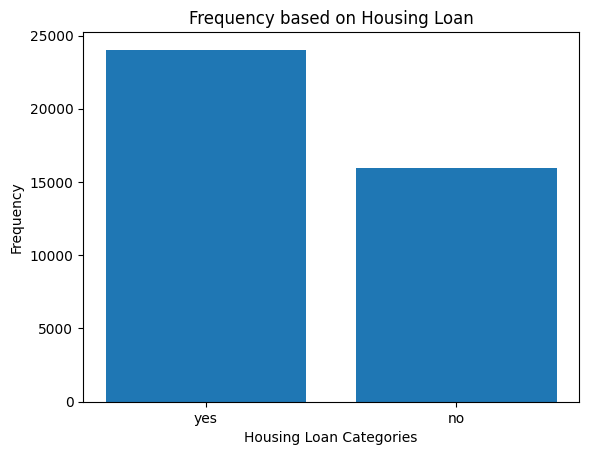

In [21]:
plt.bar(housing_category.index,housing_category.values)
plt.xlabel('Housing Loan Categories')
plt.ylabel('Frequency')
plt.title('Frequency based on Housing Loan')
plt.show()

- Customers with a Housing Loan are more.

In [22]:
loan_category = df['loan'].value_counts()
loan_category

loan
no     33070
yes     6930
Name: count, dtype: int64

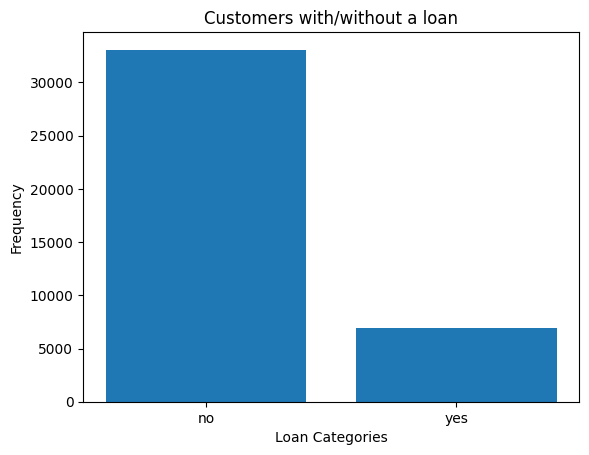

In [23]:
plt.bar(loan_category.index,loan_category.values)
plt.xlabel('Loan Categories')
plt.ylabel('Frequency')
plt.title('Customers with/without a loan')
plt.show()

- Most of the customers do not have a personal loan 

In [24]:
contact_category = df['contact'].value_counts()
contact_category

contact
cellular     24914
unknown      12765
telephone     2321
Name: count, dtype: int64

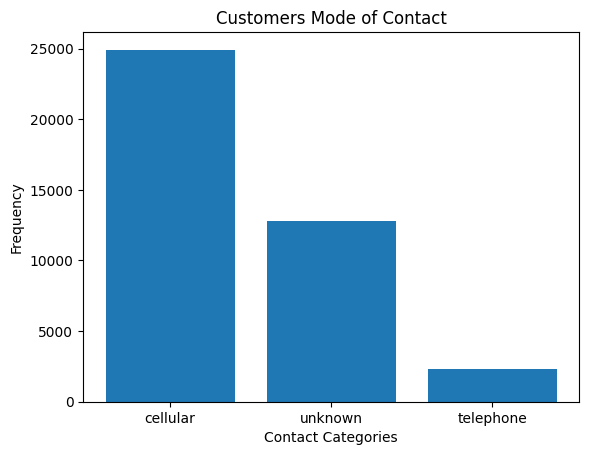

In [25]:
plt.bar(contact_category.index,contact_category.values)
plt.xlabel('Contact Categories')
plt.ylabel('Frequency')
plt.title('Customers Mode of Contact')
plt.show()

- Most customers have cellular way of contacting.

#### Plotting Positive and Negative Counts overtime (months)

In [26]:
monthly_counts = df.groupby(['month','y']).size()
monthly_counts

month  y  
apr    no      2267
       yes      451
aug    no      4927
       yes      288
dec    no        12
       yes        1
feb    no      2041
       yes      255
jan    no      1138
       yes       38
jul    no      5996
       yes      384
jun    no      4440
       yes      294
mar    no       133
       yes      125
may    no     12741
       yes      791
nov    no      3378
       yes      220
oct    no        31
       yes       49
dtype: int64

In [27]:
monthly_counts = df.groupby(['month','y']).size().unstack()
monthly_counts

y,no,yes
month,,
apr,2267,451
aug,4927,288
dec,12,1
feb,2041,255
jan,1138,38
jul,5996,384
jun,4440,294
mar,133,125
may,12741,791


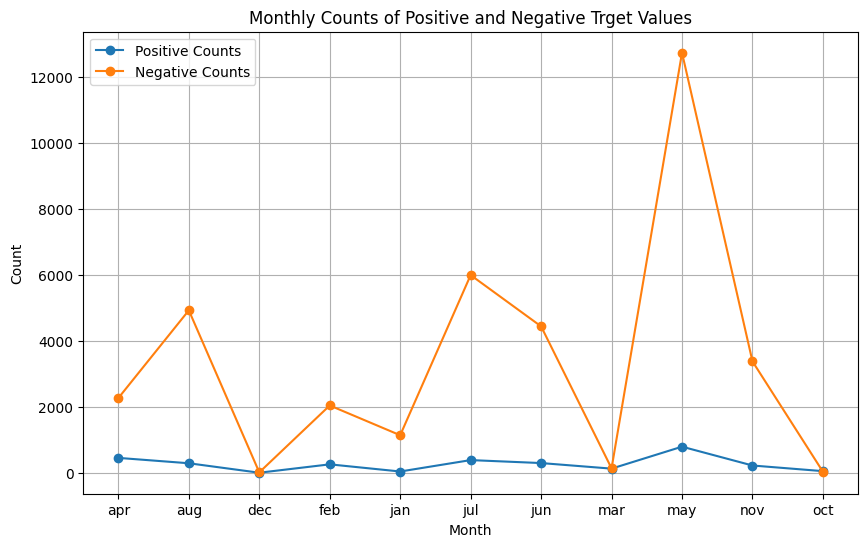

In [28]:
plt.figure(figsize=(10,6))
plt.plot(monthly_counts.index,monthly_counts['yes'],label='Positive Counts',marker='o')
plt.plot(monthly_counts.index,monthly_counts['no'],label='Negative Counts',marker='o')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Counts of Positive and Negative Trget Values')
plt.legend()
plt.grid(True)
plt.show()

#### Plot positive and negative counts over time (in days)

In [29]:
daily_counts = df.groupby(['day', 'y']).size().unstack()
daily_counts.head()

y,no,yes
day,,
1,136,40
2,1005,104
3,794,80
4,1066,117
5,1578,113


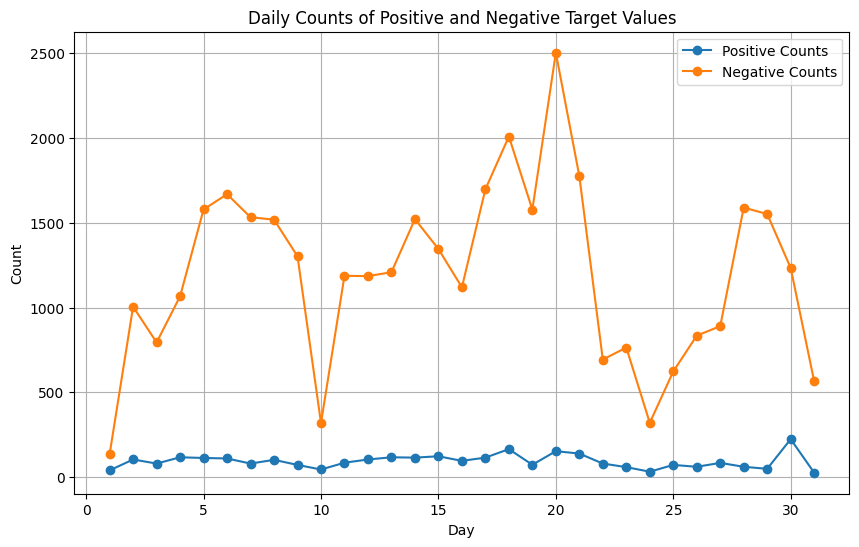

In [30]:
plt.figure(figsize=(10,6))
plt.plot(daily_counts.index, daily_counts['yes'], label='Positive Counts', marker='o')
plt.plot(daily_counts.index, daily_counts['no'], label='Negative Counts', marker='o')
plt.title('Daily Counts of Positive and Negative Target Values')
plt.xlabel('Day')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

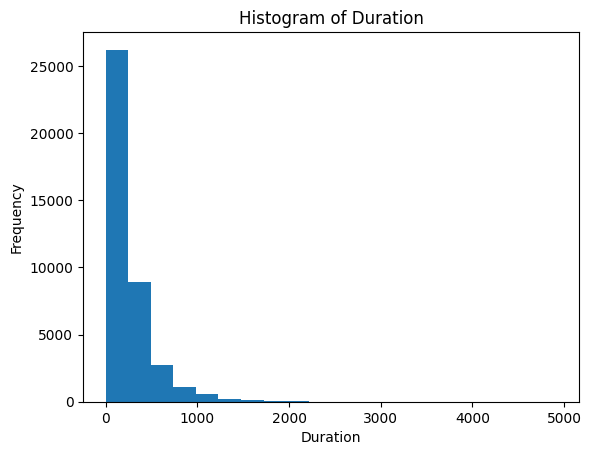

In [31]:
plt.hist(df['duration'], bins=20)
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.title('Histogram of Duration')
plt.show()

(array([2.6208e+04, 8.9290e+03, 2.7550e+03, 1.1060e+03, 5.4500e+02,
        2.3800e+02, 1.0600e+02, 5.2000e+01, 2.5000e+01, 1.2000e+01,
        7.0000e+00, 4.0000e+00, 6.0000e+00, 5.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([   0. ,  245.9,  491.8,  737.7,  983.6, 1229.5, 1475.4, 1721.3,
        1967.2, 2213.1, 2459. , 2704.9, 2950.8, 3196.7, 3442.6, 3688.5,
        3934.4, 4180.3, 4426.2, 4672.1, 4918. ]))

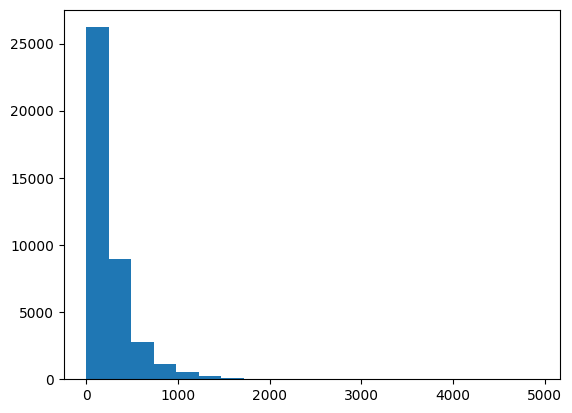

In [32]:
counts, bin_edges, patches = plt.hist(df['duration'], bins=20)
counts, bin_edges

In [33]:
# Calculate the bin ranges
bin_ranges = [(bin_edges[i], bin_edges[i+1]) for i in range(len(bin_edges) - 1)]
bin_ranges

[(0.0, 245.9),
 (245.9, 491.8),
 (491.8, 737.7),
 (737.7, 983.6),
 (983.6, 1229.5),
 (1229.5, 1475.4),
 (1475.4, 1721.3),
 (1721.3, 1967.2),
 (1967.2, 2213.1),
 (2213.1, 2459.0),
 (2459.0, 2704.9),
 (2704.9, 2950.8),
 (2950.8, 3196.7000000000003),
 (3196.7000000000003, 3442.6),
 (3442.6, 3688.5),
 (3688.5, 3934.4),
 (3934.4, 4180.3),
 (4180.3, 4426.2),
 (4426.2, 4672.1),
 (4672.1, 4918.0)]

- many of the call durations were less than 250 seconds with the second largest bin of call durations between 250 and 500 seconds

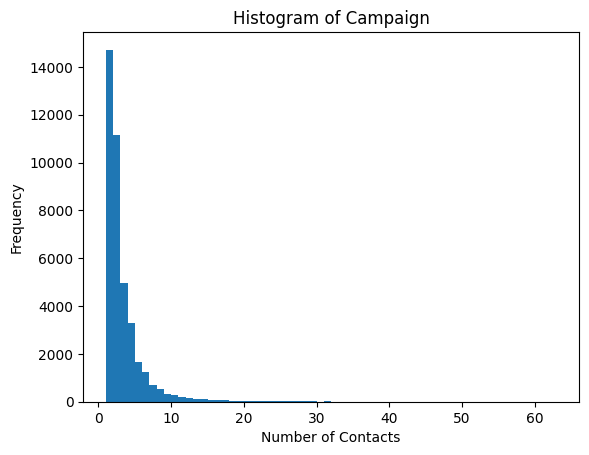

Counts: [1.4718e+04 1.1153e+04 4.9700e+03 3.2970e+03 1.6420e+03 1.2280e+03
 6.9900e+02 5.2600e+02 3.1800e+02 2.6200e+02 1.9700e+02 1.5400e+02
 1.3100e+02 9.3000e+01 8.3000e+01 7.8000e+01 6.9000e+01 5.1000e+01
 4.4000e+01 4.3000e+01 3.5000e+01 2.3000e+01 2.2000e+01 2.0000e+01
 2.2000e+01 1.3000e+01 1.0000e+01 1.6000e+01 1.6000e+01 8.0000e+00
 1.2000e+01 9.0000e+00 6.0000e+00 5.0000e+00 4.0000e+00 4.0000e+00
 2.0000e+00 3.0000e+00 1.0000e+00 0.0000e+00 2.0000e+00 0.0000e+00
 3.0000e+00 1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 2.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
 1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
 0.0000e+00 1.0000e+00]
Bin edges: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63.]


In [34]:
data_min = int(np.floor(df['campaign'].min()))  # floor to the nearest lower integer
data_max = int(np.ceil(df['campaign'].max()))   # ceil to the nearest higher integer

bin_edges = np.arange(data_min, data_max + 1, step=1)  # step=1 for integer steps

# Create the histogram using the specified bin edges
counts, bin_edges, patches = plt.hist(df['campaign'], bins=bin_edges)

plt.xlabel('Number of Contacts')
plt.ylabel('Frequency')
plt.title('Histogram of Campaign')
plt.show()

# Output the counts and bin edges
print('Counts:', counts)
print('Bin edges:', bin_edges)

In [35]:
# Calculate the bin ranges
bin_ranges = [(bin_edges[i], bin_edges[i+1]) for i in range(len(bin_edges) - 1)]
bin_ranges[:6]

[(1.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, 5.0), (5.0, 6.0), (6.0, 7.0)]

### Relationship between independent and dependent variables.

#### detailed analysis of subscription rates by age group in your dataset.

age
90-99    0.666667
70-79    0.471429
80-89    0.312500
10-19    0.166667
60-69    0.142633
20-29    0.108634
30-39    0.071850
40-49    0.061718
50-59    0.058257
0-9           NaN
Name: subscription_rate, dtype: float64


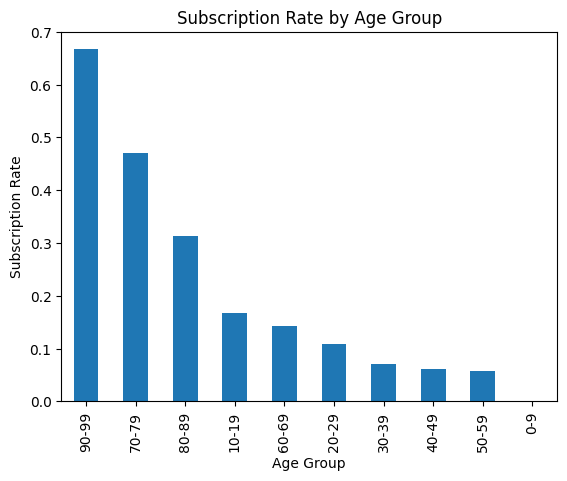

In [36]:
df['age'] = pd.cut(df['age'], bins=range(0, 101, 10), right=False, labels=[f'{i}-{i+9}' for i in range(0, 100, 10)])
age_counts = df.groupby(['age', 'y']).size().unstack(fill_value=0)
age_counts['subscription_rate'] = age_counts['yes'] / (age_counts['no'] + age_counts['yes'])
sorted_age_counts = age_counts.sort_values(by='subscription_rate', ascending=False)
print(sorted_age_counts['subscription_rate'])

sorted_age_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Age Group')
plt.show()

##### Insights
- The highest subscription rate is observed in the 90-99 age group (0.6667 or 66.67%)
- The 70-79 age group also shows a relatively high subscription rate (0.4714 or 47.14%).
- The 10-19 age group has the lowest subscription rate (0.1667 or 16.67%), indicating that younger individuals are less likely to subscribe to term deposits.
- Age groups such as 80-89, 50-59, and 40-49 show intermediate subscription rates, with values ranging from 31.25% to 5.83%.

#### analysis of subscription rates by job type

job
student          0.156489
retired          0.105080
unemployed       0.086957
management       0.082782
self-employed    0.079208
admin            0.078296
technician       0.072534
unknown          0.072340
entrepreneur     0.062633
services         0.060870
blue-collar      0.057018
housemaid        0.048758
Name: subscription_rate, dtype: float64


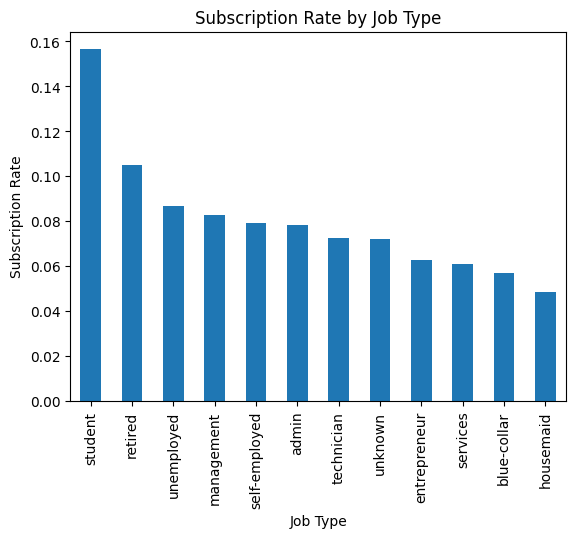

In [37]:
job_counts = df.groupby(['job', 'y']).size().unstack(fill_value=0)
job_counts['subscription_rate'] = job_counts['yes'] / (job_counts['no'] + job_counts['yes'])
sorted_job_counts = job_counts.sort_values(by='subscription_rate', ascending=False)
print(sorted_job_counts['subscription_rate'])

sorted_job_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Job Type')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Job Type')
plt.show()

##### Insights
- Students have the highest subscription rate (0.1565 or 15.65%)
- Retired individuals also have a relatively high subscription rate (0.1051 or 10.51%)
- Entrepreneurs, Services, Blue-collar, and Housemaids have lower rates, ranging from approximately 6% to 4.9%

#### code analyzes the subscription rates to a term deposit by marital status

marital
single      0.094315
divorced    0.082751
married     0.060609
Name: subscription_rate, dtype: float64


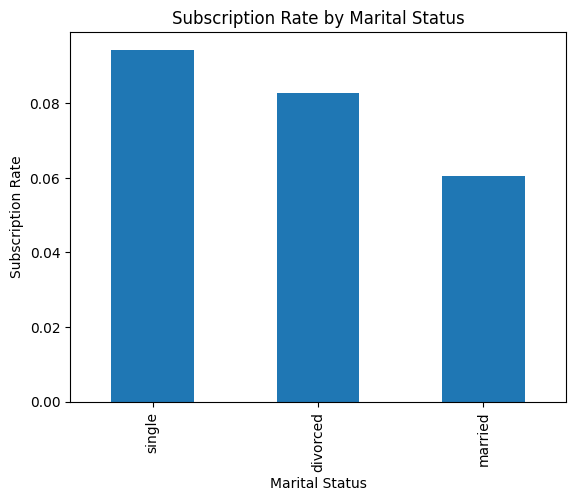

In [38]:
marital_counts = df.groupby(['marital', 'y']).size().unstack(fill_value=0)
marital_counts['subscription_rate'] = marital_counts['yes'] / (marital_counts['no'] + marital_counts['yes'])
sorted_marital_counts = marital_counts.sort_values(by='subscription_rate', ascending=False)
print(sorted_marital_counts['subscription_rate'])

sorted_marital_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Marital Status')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Marital Status')
plt.show()


##### Insights
- Single individuals have the highest subscription rate (0.0943 or 9.43%). Although the subscription rate doesn't seem to differ much between the marital statuses.

#### code analyzes the subscription rates to a term deposit based on education level

education
tertiary     0.091826
secondary    0.067546
unknown      0.062704
primary      0.056300
Name: subscription_rate, dtype: float64


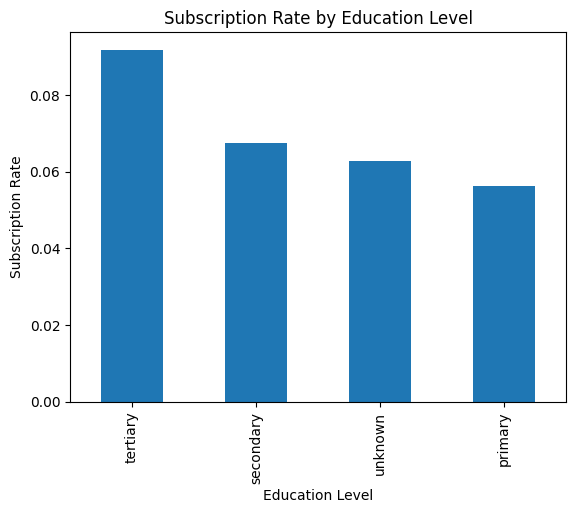

In [39]:
education_counts = df.groupby(['education', 'y']).size().unstack(fill_value=0)
education_counts['subscription_rate'] = education_counts['yes'] / (education_counts['no'] + education_counts['yes'])
sorted_education_counts = education_counts.sort_values(by='subscription_rate', ascending=False)
print(sorted_education_counts['subscription_rate'])

sorted_education_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Education Level')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Education Level')
plt.show()

##### Insights
- The education level doesn't seem to matter much in regards to subscription rate

#### code analyzes the subscription rates to a term deposit based on the credit default status

default
no     0.072644
yes    0.060569
Name: subscription_rate, dtype: float64


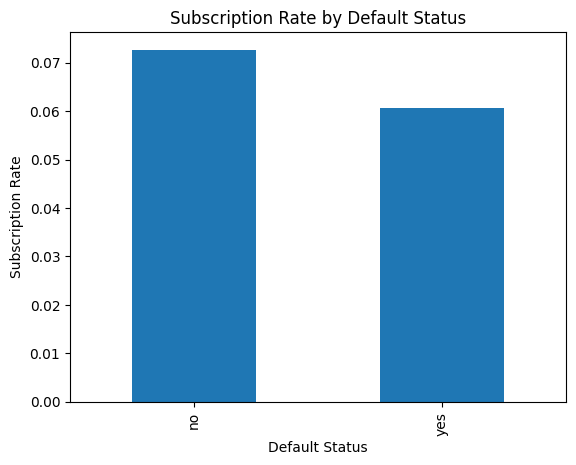

In [40]:
default_counts = df.groupby(['default', 'y']).size().unstack(fill_value=0)
default_counts['subscription_rate'] = default_counts['yes'] / (default_counts['no'] + default_counts['yes'])
sorted_default_counts = default_counts.sort_values(by='subscription_rate', ascending=False)
print(sorted_default_counts['subscription_rate'])

sorted_default_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Default Status')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Default Status')
plt.show()

##### Insights
- Default status doesn't seem to matter

#### code analyzes the subscription rates to a term deposit based on the balance attribute

balance
31900-36899     0.250000
41900-46899     0.125000
1900-6899       0.098023
6900-11899      0.097534
11900-16899     0.084000
21900-26899     0.081967
16900-21899     0.074074
-3100-1899      0.066903
26900-31899     0.055556
-8100--3101     0.000000
36900-41899     0.000000
46900-51899     0.000000
51900-56899     0.000000
56900-61899     0.000000
61900-66899     0.000000
96900-101899    0.000000
66900-71899          NaN
71900-76899          NaN
76900-81899          NaN
81900-86899          NaN
86900-91899          NaN
91900-96899          NaN
Name: subscription_rate, dtype: float64


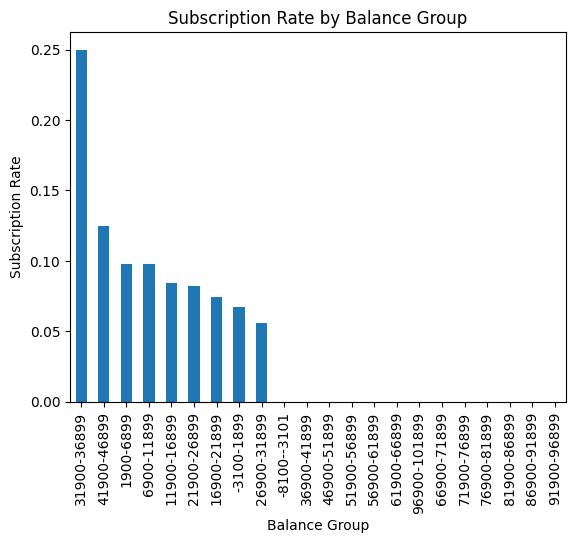

In [41]:
#Because min : -8019, max: 102127 in balance attribute.

bins = range(-8100, 103000, 5000)
labels = [f'{i}-{i+4999}' for i in bins[:-1]]
df['balance'] = pd.cut(df['balance'], bins=bins, right=False, labels=labels)

balance_counts = df.groupby(['balance', 'y']).size().unstack(fill_value=0)

balance_counts['subscription_rate'] = balance_counts['yes'] / (balance_counts['no'] + balance_counts['yes'])
sorted_balance_counts = balance_counts.sort_values(by='subscription_rate', ascending=False)
print(sorted_balance_counts['subscription_rate'])

sorted_balance_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Balance Group')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Balance Group')
plt.show()

##### Insights
- The balance ranges 31900-36899 and 41900-46899 have the highest subscription rates (0.250000 and 0.125000, respectively).
- There is a noticeable drop in subscription rates as you move away from the middle balance ranges. This might imply that clients with very low or very high balances are less likely to subscribe.

#### Filtering Relevant Balance Groups
- Exclude groups with NaN or zero subscription rates

y               no   yes  subscription_rate
balance                                    
31900-36899      9     3           0.250000
41900-46899      7     1           0.125000
1900-6899     5383   585           0.098023
6900-11899     805    87           0.097534
11900-16899    229    21           0.084000
21900-26899     56     5           0.081967
16900-21899    100     8           0.074074
-3100-1899   30474  2185           0.066903
26900-31899     17     1           0.055556


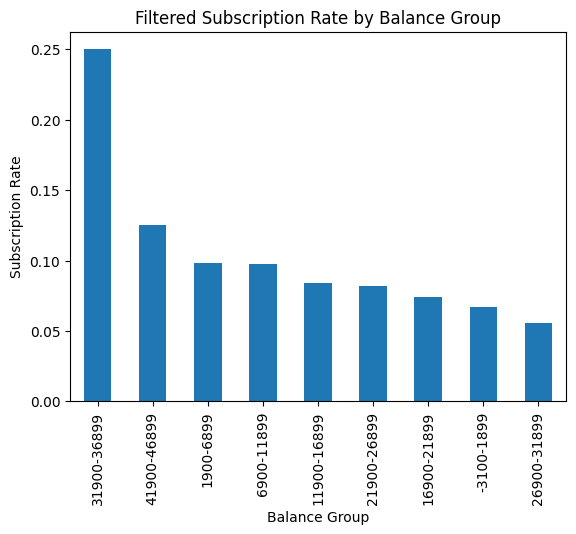

In [42]:
filtered_balance_counts = sorted_balance_counts[
    sorted_balance_counts['subscription_rate'].notna() & 
    (sorted_balance_counts['subscription_rate'] > 0)
]

print(filtered_balance_counts)

filtered_balance_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Balance Group')
plt.ylabel('Subscription Rate')
plt.title('Filtered Subscription Rate by Balance Group')
plt.show()

#### code analyzes the subscription rates for term deposits based on whether customers have a housing loan.

housing
no     0.089674
yes    0.060921
Name: subscription_rate, dtype: float64


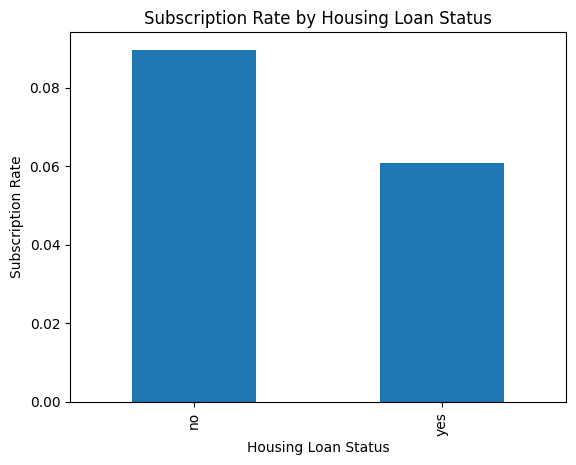

In [43]:
housing_counts = df.groupby(['housing', 'y']).size().unstack(fill_value=0)
housing_counts['subscription_rate'] = housing_counts['yes'] / (housing_counts['no'] + housing_counts['yes'])
sorted_housing_counts = housing_counts.sort_values(by='subscription_rate', ascending=False)
print(sorted_housing_counts['subscription_rate'])

sorted_housing_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Housing Loan Status')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Housing Loan Status')
plt.show()

##### Insights
- The housing loan status doesn't seem to make a big difference

#### code analyzes the subscription rates for term deposits based on whether customers have a personal loan.

loan
no     0.076081
yes    0.054834
Name: subscription_rate, dtype: float64


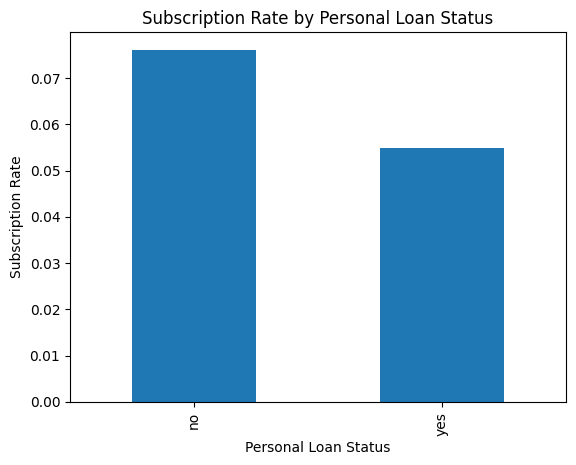

In [44]:
loan_counts = df.groupby(['loan', 'y']).size().unstack(fill_value=0)
loan_counts['subscription_rate'] = loan_counts['yes'] / (loan_counts['no'] + loan_counts['yes'])
sorted_loan_counts = loan_counts.sort_values(by='subscription_rate', ascending=False)
print(sorted_loan_counts['subscription_rate'])

sorted_loan_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Personal Loan Status')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Personal Loan Status')
plt.show()

##### Insights
- there isn't a huge difference between personal loan status types

#### code compares the subscription rates for term deposits based on the type of contact used to communicate with customers.

contact
cellular     0.089628
telephone    0.071521
unknown      0.038935
Name: subscription_rate, dtype: float64


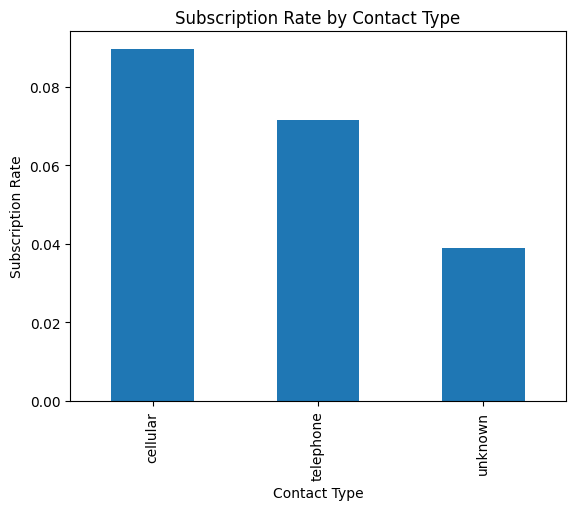

In [45]:
contact_counts = df.groupby(['contact', 'y']).size().unstack(fill_value=0)
contact_counts['subscription_rate'] = contact_counts['yes'] / (contact_counts['no'] + contact_counts['yes'])
sorted_contact_counts = contact_counts.sort_values(by='subscription_rate', ascending=False)
print(sorted_contact_counts['subscription_rate'])

sorted_contact_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Contact Type')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Contact Type')
plt.show()

##### Insights
- cellular is the best contact type, with telephone being second best

#### code compares the subscription rates for term deposits based on the month of the last contact with the customer.

month
oct    0.612500
mar    0.484496
apr    0.165931
feb    0.111063
dec    0.076923
jun    0.062104
nov    0.061145
jul    0.060188
may    0.058454
aug    0.055225
jan    0.032313
Name: subscription_rate, dtype: float64


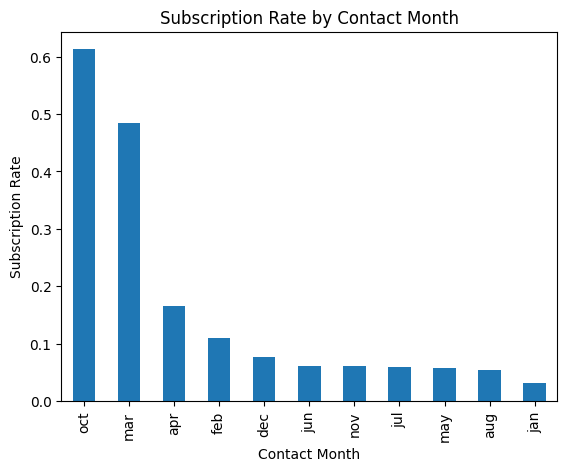

In [46]:
month_counts = df.groupby(['month', 'y']).size().unstack(fill_value=0)
month_counts['subscription_rate'] = month_counts['yes'] / (month_counts['no'] + month_counts['yes'])
sorted_month_counts = month_counts.sort_values(by='subscription_rate', ascending=False)
print(sorted_month_counts['subscription_rate'])

sorted_month_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Contact Month')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Contact Month')
plt.show()

##### Insights
- the best months to contact are october and March

#### compares the subscription rates for term deposits based on the day of the month when the last contact with the customer occurred.

day
1     0.227273
30    0.153741
10    0.123626
25    0.103597
22    0.103493
Name: subscription_rate, dtype: float64


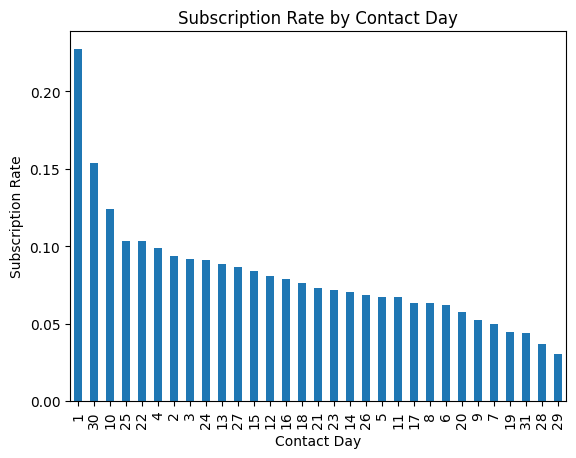

In [47]:
day_counts = df.groupby(['day', 'y']).size().unstack(fill_value=0)
day_counts['subscription_rate'] = day_counts['yes'] / (day_counts['no'] + day_counts['yes'])
sorted_day_counts = day_counts.sort_values(by='subscription_rate', ascending=False)
print(sorted_day_counts['subscription_rate'][:5])

sorted_day_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Contact Day')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Contact Day')
plt.show()

##### Insights
- the best days to contact seem to be either the first of the month or last of the month

#### compare contact duration to subscription rate

duration
3750-3999    1.000000
2500-2749    0.800000
2750-2999    0.750000
1500-1749    0.704082
3000-3249    0.666667
1250-1499    0.613333
1000-1249    0.576779
1750-1999    0.566038
2250-2499    0.545455
2000-2249    0.473684
750-999      0.472846
500-749      0.278761
3250-3499    0.200000
250-499      0.067344
0-249        0.017813
4750-4999    0.000000
3500-3749         NaN
4000-4249         NaN
4250-4499         NaN
4500-4749         NaN
Name: subscription_rate, dtype: float64


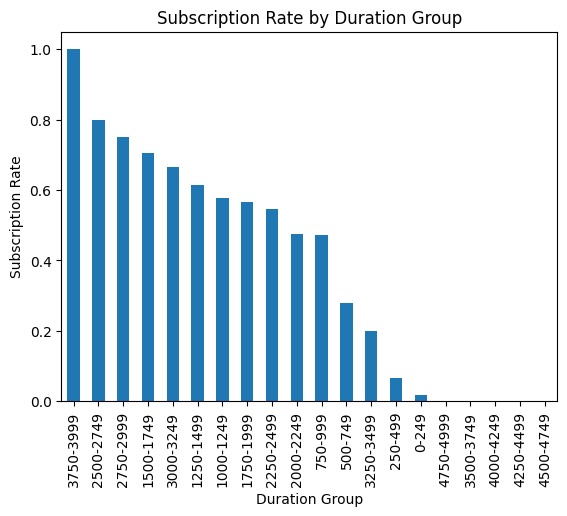

In [48]:
bin_edges = range(0, 5000 + 1, 250)  # +1 to include the max value of 4918
labels = [f'{i}-{i+249}' for i in bin_edges[:-1]]  # Exclude the last bin edge
df['duration'] = pd.cut(df['duration'], bins=bin_edges, labels=labels, right=False)
duration_counts = df.groupby(['duration', 'y']).size().unstack(fill_value=0)
duration_counts['subscription_rate'] = duration_counts['yes'] / (duration_counts['no'] + duration_counts['yes'])
sorted_duration_counts = duration_counts.sort_values(by='subscription_rate', ascending=False)
print(sorted_duration_counts['subscription_rate'])

sorted_duration_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Duration Group')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Duration Group')
plt.show()

##### If we take a look at only the cases where there are at least 100 subscriptions

In [49]:
sorted_duration_counts[sorted_duration_counts['yes']>100]

y,no,yes,subscription_rate
duration,,,
1250-1499,87,138,0.613333
1000-1249,226,308,0.576779
750-999,563,505,0.472846
500-749,1956,756,0.278761
250-499,8171,590,0.067344
0-249,26025,472,0.017813


##### Insights
- The best duration ranges between 0 to 1500 seconds, with higher conversion rates for 500-1500 seconds

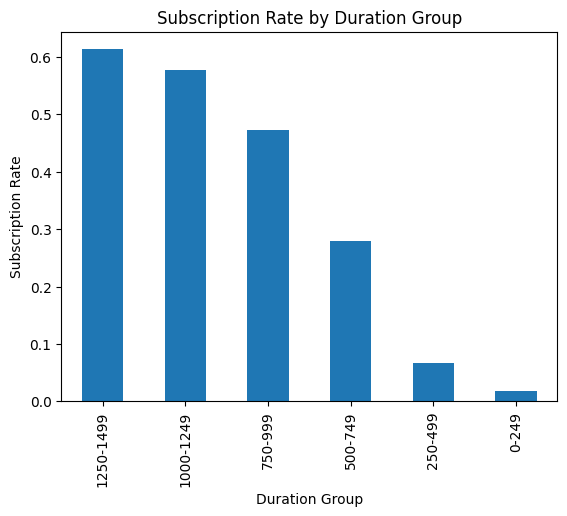

In [50]:
filtered_duration_counts = sorted_duration_counts[sorted_duration_counts['yes'] >= 100]

filtered_duration_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Duration Group')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Duration Group')
plt.show()

#### compare campaign count with subscription rate

campaign
0-2      0.078234
3-5      0.067514
9-11     0.056628
6-8      0.052181
15-17    0.052174
12-14    0.037037
30-32    0.034483
27-29    0.023810
24-26    0.018182
21-23    0.012500
18-20    0.007246
33-35    0.000000
36-38    0.000000
39-41    0.000000
42-44    0.000000
45-47    0.000000
48-50    0.000000
51-53    0.000000
54-56    0.000000
57-59    0.000000
60-62         NaN
Name: subscription_rate, dtype: float64


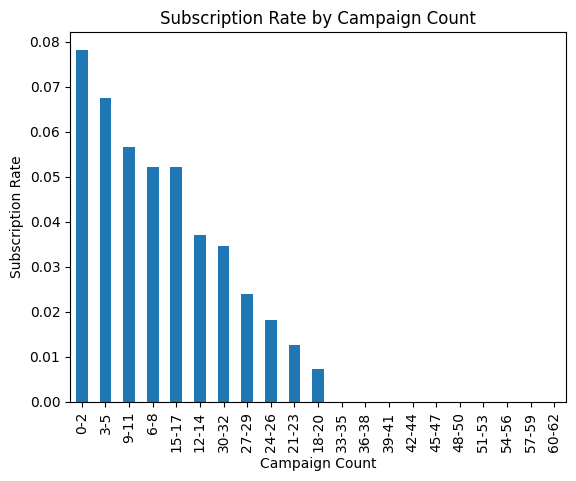

In [51]:
bin_edges = range(0, 65 + 1, 3)
labels = [f'{i}-{i+2}' for i in bin_edges[:-1]]
df['campaign'] = pd.cut(df['campaign'], bins=bin_edges, labels=labels, right=False)

campaign_counts = df.groupby(['campaign', 'y']).size().unstack(fill_value=0)
campaign_counts['subscription_rate'] = campaign_counts['yes'] / (campaign_counts['no'] + campaign_counts['yes'])
sorted_campaign_counts = campaign_counts.sort_values(by='subscription_rate', ascending=False)
print(sorted_campaign_counts['subscription_rate'])

sorted_campaign_counts['subscription_rate'].plot(kind='bar')
plt.xlabel('Campaign Count')
plt.ylabel('Subscription Rate')
plt.title('Subscription Rate by Campaign Count')
plt.show()

##### Insights
- The more contacts made, the less successful for subscription; so less contacts made is better

### Data Preprocessing

In [4]:
dataset = pd.read_csv('term-deposit-marketing-2020.csv')
dataset.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


- I have three binary features default, housing, and loan.  I will convert these into 0's and 1's
- I will also convert the 'y' column into 0's and 1's
- I will one-hot encode 'job', 'marital', 'education', 'contact'
- for month just convert to numbers between 1 and 12


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset['default'] = le.fit_transform(dataset['default'])  # Assumes values are 'yes' and 'no'
dataset['housing'] = le.fit_transform(dataset['housing']) 
dataset['loan'] = le.fit_transform(dataset['loan']) 
dataset['y'] = le.fit_transform(dataset['y']) 

dataset_encoded = pd.get_dummies(dataset, columns=['job'], prefix='job')
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['marital'], prefix='marital')
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['education'], prefix='education')
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['contact'], prefix='contact')

month_dict = {
    'jan': 1, 'feb': 2, 'mar': 3,
    'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9,
    'oct': 10, 'nov': 11, 'dec': 12
}
dataset_encoded['month'] = dataset['month'].str.lower().replace(month_dict)

dataset_encoded = dataset_encoded.astype(int)

In [54]:
dataset_encoded.head()

,age,default,balance,housing,loan,day,month,duration,campaign,y,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,0,2143,1,0,5,5,261,1,0,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,0,...,0,0,1,0,1,0,0,0,0,1
2,33,0,2,1,1,5,5,76,1,0,...,0,1,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,0,...,0,1,0,0,0,0,1,0,0,1
4,33,0,1,0,0,5,5,198,1,0,...,0,0,1,0,0,0,1,0,0,1


In [55]:
dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  40000 non-null  int32
 1   default              40000 non-null  int32
 2   balance              40000 non-null  int32
 3   housing              40000 non-null  int32
 4   loan                 40000 non-null  int32
 5   day                  40000 non-null  int32
 6   month                40000 non-null  int32
 7   duration             40000 non-null  int32
 8   campaign             40000 non-null  int32
 9   y                    40000 non-null  int32
 10  job_admin            40000 non-null  int32
 11  job_blue-collar      40000 non-null  int32
 12  job_entrepreneur     40000 non-null  int32
 13  job_housemaid        40000 non-null  int32
 14  job_management       40000 non-null  int32
 15  job_retired          40000 non-null  int32
 16  job_self-employed    4

In [56]:
X = dataset_encoded.drop(columns=['y']).values
Y = dataset_encoded['y'].values

In [9]:
import random
#seed = random.randint(1000,9999)
#print(seed)
seed=6666

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = seed)

In [59]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
preprocessing_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

X_train_scaled = preprocessing_pipeline.fit_transform(X_train)
X_test_scaled = preprocessing_pipeline.transform(X_test)

#### SMOTE
- Purpose: To increase the number of samples in the minority class by generating synthetic samples.
#### ENN
- Purpose: To remove noisy or borderline examples from the minority class after applying SMOTE.

In [60]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline as imPipeline

smote = SMOTE(random_state=seed)
enn = EditedNearestNeighbours()

# Combine SMOTE and ENN in a pipeline
resampling_pipeline = imPipeline(steps=[('smote', smote), ('enn', enn)])

# Apply SMOTE-ENN to the scaled training data
X_train_resampled, y_train_resampled = resampling_pipeline.fit_resample(X_train_scaled, y_train)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((32000, 31), (8000, 31), (32000,), (8000,))

In [62]:
X_train_resampled.shape, X_test_scaled.shape, y_train_resampled.shape, y_test.shape

((58761, 31), (8000, 31), (58761,), (8000,))

In [63]:
from collections import Counter
class_counts = Counter(y_train_resampled)
class_counts

Counter({0: 29718, 1: 29043})

#### The dataset has become balanced, after performing SMOTE-ENN.

### Performing Model comparison using PyCaret and selecting Top3 best-performing Models with AutoML TPOT.

In [64]:
#!pip install pycaret tpot

#### Model comparison with PyCaret.

In [65]:
import pandas as pd

# Combine X_train_resampled and y_train_resampled into a DataFrame
train_df = pd.DataFrame(X_train_resampled, columns=dataset_encoded.drop(columns=['y']).columns)
train_df['y'] = y_train_resampled

In [66]:
from pycaret.classification import setup, compare_models, get_config, pull

#Setting up the PyCaret environment
clf = setup(data=train_df, target='y', session_id=seed,
            preprocess=False,
            fix_imbalance=False, verbose=False)
best_models = compare_models(n_select=3,sort='F1')
best_models_df = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9752,0.9979,0.9928,0.9585,0.9753,0.9504,0.9510,1.1090
rf,Random Forest Classifier,0.9647,0.9961,0.9820,0.9485,0.9649,0.9295,0.9300,1.0190
xgboost,Extreme Gradient Boosting,0.9653,0.9957,0.9656,0.9642,0.9649,0.9306,0.9306,0.4010
lightgbm,Light Gradient Boosting Machine,0.9622,0.9954,0.9671,0.9569,0.9620,0.9245,0.9245,0.3890
dt,Decision Tree Classifier,0.9381,0.9381,0.9437,0.9319,0.9378,0.8762,0.8762,0.1200
gbc,Gradient Boosting Classifier,0.9374,0.9867,0.9543,0.9219,0.9378,0.8749,0.8755,2.3180
knn,K Neighbors Classifier,0.9297,0.9733,0.9947,0.8790,0.9333,0.8595,0.8669,0.5830
ada,Ada Boost Classifier,0.9155,0.9720,0.9208,0.9095,0.9151,0.8311,0.8312,0.5870
lr,Logistic Regression,0.8461,0.9199,0.8373,0.8492,0.8432,0.6921,0.6922,0.4070
svm,SVM - Linear Kernel,0.8409,0.9143,0.8485,0.8329,0.8405,0.6818,0.6821,0.1190


#### AutoML using TPOT

In [64]:
"""
from tpot import TPOTClassifier
from sklearn.metrics import recall_score

# TPOT model
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=seed, scoring='recall')
tpot.fit(X_train_resampled, y_train_resampled)

# Export the best model
tpot.export('best_model_pipeline.py')

y_pred = tpot.predict(X_test_scaled)
recall = recall_score(y_test, y_pred)
print(f'TPOT Model Recall: {recall:.4f}')
"""

"\nfrom tpot import TPOTClassifier\nfrom sklearn.metrics import recall_score\n\n# TPOT model\ntpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=seed, scoring='recall')\ntpot.fit(X_train_resampled, y_train_resampled)\n\n# Export the best model\ntpot.export('best_model_pipeline.py')\n\ny_pred = tpot.predict(X_test_scaled)\nrecall = recall_score(y_test, y_pred)\nprint(f'TPOT Model Recall: {recall:.4f}')\n"

## Case 1
### Focusing on Recall for Class 1 (considering no calls are made)

In [65]:
df1 = dataset_encoded.drop(columns=['day','month','duration'])
X1 = df1.drop(columns=['y'])
y1 = df1['y']
X1_train,X1_test,y1_train,y1_test = train_test_split(X1,y1,test_size=0.2,random_state=seed)

preprocessing_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

X1_train = preprocessing_pipeline.fit_transform(X1_train)
X1_test = preprocessing_pipeline.transform(X1_test)

smote = SMOTE(random_state=seed)
enn = EditedNearestNeighbours()

resampling_pipeline = imPipeline(steps=[('smote', smote), ('enn', enn)])

# Apply SMOTE-ENN to the scaled training data
X1_train_resampled, y1_train_resampled = resampling_pipeline.fit_resample(X1_train, y1_train)


In [66]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,recall_score
from sklearn.model_selection import cross_val_score

### 1. Extra Trees Classifier


In [67]:
extra_trees_model = ExtraTreesClassifier(random_state=seed)
extra_trees_model.fit(X1_train_resampled,y1_train_resampled)
extra_trees_ypred = extra_trees_model.predict(X1_test)
extra_trees_recall = recall_score(y1_test,extra_trees_ypred)
print(f'Extra Trees Classifier Recall: {extra_trees_recall:.4f}')
print(classification_report(y1_test, extra_trees_ypred))

Extra Trees Classifier Recall: 0.1124
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      7386
           1       0.15      0.11      0.13       614

    accuracy                           0.88      8000
   macro avg       0.54      0.53      0.53      8000
weighted avg       0.87      0.88      0.87      8000



### 2. Random Forest Classifier

In [68]:
rf_model = RandomForestClassifier(random_state=seed)
rf_model.fit(X1_train_resampled,y1_train_resampled)
rf_model_ypred = rf_model.predict(X1_test)
rf_model_recall = recall_score(y1_test, rf_model_ypred)
print(f'Random Forest Classifier Recall: {rf_model_recall:.4f}')
print(classification_report(y1_test, rf_model_ypred))

Random Forest Classifier Recall: 0.0945
              precision    recall  f1-score   support

           0       0.93      0.96      0.94      7386
           1       0.17      0.09      0.12       614

    accuracy                           0.90      8000
   macro avg       0.55      0.53      0.53      8000
weighted avg       0.87      0.90      0.88      8000



### 3. Extreme Gradient Boosting (XGBoost)

In [69]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=seed)
xgb_model.fit(X1_train_resampled, y1_train_resampled)
xgb_y_pred = xgb_model.predict(X1_test)
xgb_recall = recall_score(y1_test, xgb_y_pred)
print(f'XGBoost Classifier Recall: {xgb_recall:.4f}')
print(classification_report(y1_test, xgb_y_pred))

XGBoost Classifier Recall: 0.0668
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7386
           1       0.35      0.07      0.11       614

    accuracy                           0.92      8000
   macro avg       0.64      0.53      0.53      8000
weighted avg       0.88      0.92      0.89      8000



In [70]:
#To overcome the imbalanced data issue, we can apply oversampling and undersampling
#!pip install -U imbalanced-learn

In [71]:
import imblearn
# Oversampling and under sampling
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from collections import Counter

### Oversampling

In [72]:
#Oversampling

# Randomly over-sample the minority class
ros = RandomOverSampler(random_state=seed, sampling_strategy='minority')
X1_train_ros, y1_train_ros= ros.fit_resample(X1_train, y1_train)
# Check the number of records after over sampling
print(sorted(Counter(y1_train_ros).items()))

[(0, 29718), (1, 29718)]


### ExtraTreeClassifier - OverSampling

In [73]:
# Fitting Extra Trees Classifier to the Training set
extra_trees_classifier = ExtraTreesClassifier(criterion='entropy', n_estimators=100, random_state=seed)
extra_trees_classifier.fit(X1_train_ros, y1_train_ros)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(extra_trees_classifier, X1_train_ros, y1_train_ros, cv=5)

# The cv_scores array will contain the accuracy for each fold
mean_cv_score = cv_scores.mean()

# Output the mean accuracy across the 5 folds
print(f'Mean CV Accuracy: {mean_cv_score * 100:.2f}%')

# Predicting the Test set results
Y_pred_et = extra_trees_classifier.predict(X1_test)

# Check the precision, recall, and f1-score
print(f'Classification Report:\n{classification_report(y1_test, Y_pred_et)}')

Mean CV Accuracy: 98.25%
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7386
           1       0.14      0.06      0.09       614

    accuracy                           0.90      8000
   macro avg       0.54      0.52      0.52      8000
weighted avg       0.87      0.90      0.88      8000



### RandomForest - Oversampling

In [74]:
#Perform Random Forest with oversampling

#Fitting random forest classifier to the Training set
classifier = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=seed)
classifier.fit(X1_train_ros,y1_train_ros)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(classifier, X1_train_ros, y1_train_ros, cv=5)

# The cv_scores array will contain the accuracy for each fold
mean_cv_score = cv_scores.mean()

# Output the mean accuracy across the 5 folds
print(f'Mean CV Accuracy: {mean_cv_score * 100:.2f}%')

#Predicting the Test set results
Y_pred_rf = classifier.predict(X1_test)

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(y1_test,Y_pred_rf)}')

Mean CV Accuracy: 98.05%
classification report:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      7386
           1       0.18      0.08      0.11       614

    accuracy                           0.90      8000
   macro avg       0.56      0.53      0.53      8000
weighted avg       0.87      0.90      0.88      8000



### XGBClassifier - OverSampling

In [75]:
# Fitting XGBoost Classifier to the Training set
xgb_classifier = XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X1_train_ros, y1_train_ros)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb_classifier, X1_train_ros, y1_train_ros, cv=5)

# The cv_scores array will contain the accuracy for each fold
mean_cv_score = cv_scores.mean()

# Output the mean accuracy across the 5 folds
print(f'Mean CV Accuracy: {mean_cv_score * 100:.2f}%')

# Predicting the Test set results
Y_pred_xgb = xgb_classifier.predict(X1_test)

# Check the precision, recall, and f1-score
print(f'Classification Report:\n{classification_report(y1_test, Y_pred_xgb)}')

Mean CV Accuracy: 82.27%
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.77      0.84      7386
           1       0.12      0.38      0.18       614

    accuracy                           0.74      8000
   macro avg       0.53      0.57      0.51      8000
weighted avg       0.87      0.74      0.79      8000



### Logistic Regression - OverSampling

In [76]:
from sklearn.linear_model import LogisticRegression
#Fitting Logistic Regression to the randomly over-sampled Training set
classifier_ros = LogisticRegression(max_iter=1000)
classifier_ros.fit(X1_train_ros,y1_train_ros)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(classifier_ros, X1_train_ros, y1_train_ros, cv=5)

# The cv_scores array will contain the accuracy for each fold
mean_cv_score = cv_scores.mean()

# Output the mean accuracy across the 5 folds
print(f'Mean CV Accuracy: {mean_cv_score * 100:.2f}%')

#Predicting the Test set results
Y_pred_ros = classifier_ros.predict(X1_test)

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(classification_report(y1_test,Y_pred_ros))

Mean CV Accuracy: 60.52%
              precision    recall  f1-score   support

           0       0.95      0.57      0.71      7386
           1       0.11      0.66      0.19       614

    accuracy                           0.57      8000
   macro avg       0.53      0.61      0.45      8000
weighted avg       0.89      0.57      0.67      8000



### UnderSampling

In [77]:
#Undersampling approach

# Randomly under sample the majority class
rus = RandomUnderSampler(random_state=seed)
X_train_rus, Y_train_rus= rus.fit_resample(X1_train, y1_train)
# Check the number of records after under sampling
print(sorted(Counter(Y_train_rus).items()))

[(0, 2282), (1, 2282)]


### Extra Tree Classifier - UnderSampling

In [78]:
from sklearn.metrics import accuracy_score
# Fitting Extra Trees Classifier to the Training set
extra_trees_classifier = ExtraTreesClassifier(criterion='entropy', n_estimators=100,random_state=seed)
extra_trees_classifier.fit(X_train_rus, Y_train_rus)

# Predicting the Test set results
Y_pred_et = extra_trees_classifier.predict(X1_test)

# Check the accuracy
print(f'Accuracy: {accuracy_score(Y_pred_et, y1_test):.2f}')

# Check the precision, recall, and f1-score
print(f'Classification Report:\n{classification_report(y1_test, Y_pred_et)}')

Accuracy: 0.57
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.57      0.71      7386
           1       0.11      0.63      0.18       614

    accuracy                           0.57      8000
   macro avg       0.53      0.60      0.45      8000
weighted avg       0.88      0.57      0.67      8000



In [79]:
#!pip install optuna

### Code with Optuna Hyperparameter Tuning

In [81]:
"""
import optuna
from optuna.samplers import TPESampler
from sklearn.model_selection import cross_val_score, StratifiedKFold


# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to be tuned
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 30)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    
    # Define Extra Trees model
    extra_trees_classifier = ExtraTreesClassifier(
        criterion='entropy',
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=seed
    )
    
    # 5-fold Stratified Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    scores = cross_val_score(extra_trees_classifier, X_train_rus, Y_train_rus, cv=skf, scoring='recall')
    return scores.mean()

# Optuna study
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=seed))
study.optimize(objective, n_trials=50)


# Print the best hyperparameters found by Optuna
print(f'Best Hyperparameters: {study.best_params}')
"""

"\nimport optuna\nfrom optuna.samplers import TPESampler\nfrom sklearn.model_selection import cross_val_score, StratifiedKFold\n\n\n# Define the objective function for Optuna\ndef objective(trial):\n    # Hyperparameters to be tuned\n    n_estimators = trial.suggest_int('n_estimators', 50, 300)\n    max_depth = trial.suggest_int('max_depth', 3, 30)\n    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)\n    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)\n    \n    # Define Extra Trees model\n    extra_trees_classifier = ExtraTreesClassifier(\n        criterion='entropy',\n        n_estimators=n_estimators,\n        max_depth=max_depth,\n        min_samples_split=min_samples_split,\n        min_samples_leaf=min_samples_leaf,\n        random_state=seed\n    )\n    \n    # 5-fold Stratified Cross-Validation\n    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)\n    scores = cross_val_score(extra_trees_classifier, X_train_rus, Y_train_rus,

- Best Hyperparameters: {'n_estimators': 244, 'max_depth': 3, 'min_samples_split': 19, 'min_samples_leaf': 9} (seed - 6666)

In [80]:
# Fitting Extra Trees Classifier to the Training set
extra_trees_classifier = ExtraTreesClassifier(criterion='entropy', n_estimators=244,max_depth=3,min_samples_split=19,min_samples_leaf=9,random_state=seed)
extra_trees_classifier.fit(X_train_rus, Y_train_rus)

# Predicting the Test set results
Y_pred_et = extra_trees_classifier.predict(X1_test)

# Check the accuracy
print(f'Accuracy: {accuracy_score(Y_pred_et, y1_test):.2f}')

# Check the precision, recall, and f1-score
print(f'Classification Report:\n{classification_report(y1_test, Y_pred_et)}')

Accuracy: 0.49
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.47      0.63      7386
           1       0.10      0.73      0.18       614

    accuracy                           0.49      8000
   macro avg       0.53      0.60      0.40      8000
weighted avg       0.89      0.49      0.59      8000



#### After using OPTUNA Hyperparameter tuning.
#### For ExtraTreeClassifier model,
#### Recall for class 1 increased from 0.63 --> 0.73

### RandomForest - Undersampling

In [81]:
#Perform Random Forest with undersampling

#Fitting random forest classifier to the Training set
classifier = RandomForestClassifier(criterion='entropy', n_estimators=100, random_state=seed)
classifier.fit(X_train_rus,Y_train_rus)

#Predicting the Test set results
Y_pred_rf = classifier.predict(X1_test)

from sklearn.metrics import accuracy_score
print("Accuracy:" ,accuracy_score(Y_pred_rf,y1_test))

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(y1_test,Y_pred_rf)}')

Accuracy: 0.600125
classification report:
              precision    recall  f1-score   support

           0       0.95      0.60      0.73      7386
           1       0.11      0.61      0.19       614

    accuracy                           0.60      8000
   macro avg       0.53      0.61      0.46      8000
weighted avg       0.88      0.60      0.69      8000



### Code with Optuna Hyperparameter Tuning

In [82]:
"""
# Define the objective function for Optuna
def objective(trial):
    # Define hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2'])
    
    # Create and fit the RandomForestClassifier with the current hyperparameters
    classifier = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        criterion='entropy',
        random_state=seed
    )
    
    # Fit the classifier
    classifier.fit(X_train_rus, Y_train_rus)
    
    # Predict on the test set
    Y_pred_rf = classifier.predict(X1_test)
    
    # Calculate recall for class 1
    recall = recall_score(y1_test, Y_pred_rf, pos_label=1)
    
    return recall

# Define the study and optimize
study = optuna.create_study(direction='maximize')  # We want to maximize recall
study.optimize(objective, n_trials=50)  # Number of trials can be adjusted

# Print the best parameters and recall
print("Best parameters:", study.best_params)
print("Best recall score:", study.best_value)
"""

'\n# Define the objective function for Optuna\ndef objective(trial):\n    # Define hyperparameters to tune\n    n_estimators = trial.suggest_int(\'n_estimators\', 50, 200)\n    max_depth = trial.suggest_int(\'max_depth\', 10, 50)\n    min_samples_split = trial.suggest_int(\'min_samples_split\', 2, 10)\n    min_samples_leaf = trial.suggest_int(\'min_samples_leaf\', 1, 10)\n    max_features = trial.suggest_categorical(\'max_features\', [\'sqrt\', \'log2\'])\n    \n    # Create and fit the RandomForestClassifier with the current hyperparameters\n    classifier = RandomForestClassifier(\n        n_estimators=n_estimators,\n        max_depth=max_depth,\n        min_samples_split=min_samples_split,\n        min_samples_leaf=min_samples_leaf,\n        max_features=max_features,\n        criterion=\'entropy\',\n        random_state=seed\n    )\n    \n    # Fit the classifier\n    classifier.fit(X_train_rus, Y_train_rus)\n    \n    # Predict on the test set\n    Y_pred_rf = classifier.predict(X

- Best parameters: {'n_estimators': 200, 'max_depth': 11, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'log2'}(seed-6666)

In [83]:
#Perform Random Forest with undersampling

#Fitting random forest classifier to the Training set
classifier = RandomForestClassifier(criterion='entropy', n_estimators=200,max_depth=11, min_samples_split=2,min_samples_leaf=2,max_features='log2', random_state=seed)
classifier.fit(X_train_rus,Y_train_rus)

#Predicting the Test set results
Y_pred_rf = classifier.predict(X1_test)

from sklearn.metrics import accuracy_score
print("Accuracy:" ,accuracy_score(Y_pred_rf,y1_test))

#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(f'classification report:\n{classification_report(y1_test,Y_pred_rf)}')

Accuracy: 0.590625
classification report:
              precision    recall  f1-score   support

           0       0.96      0.58      0.72      7386
           1       0.12      0.67      0.20       614

    accuracy                           0.59      8000
   macro avg       0.54      0.63      0.46      8000
weighted avg       0.89      0.59      0.68      8000



#### After using OPTUNA Hyperparameter tuning.¶
#### For RandomForestClassifier model,
#### Recall for 1 increased from 0.61 --> 0.67

### XGBClassifier - UnderSampling

In [84]:
# Fitting XGBoost Classifier to the Training set
xgb_classifier = XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='logloss')
xgb_classifier.fit(X_train_rus, Y_train_rus)

# Predicting the Test set results
Y_pred_xgb = xgb_classifier.predict(X1_test)

# Check the accuracy
print(f'Accuracy: {accuracy_score(Y_pred_xgb, y1_test):.2f}')

# Check the precision, recall, and f1-score
print(f'Classification Report:\n{classification_report(y1_test, Y_pred_xgb)}')

Accuracy: 0.58
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.58      0.72      7386
           1       0.11      0.61      0.18       614

    accuracy                           0.58      8000
   macro avg       0.53      0.59      0.45      8000
weighted avg       0.88      0.58      0.68      8000



### Code with Optuna Hyperparameter Tuning

In [85]:
"""
# Define the objective function for Optuna
def objective(trial):
    # Hyperparameters to be tuned
    n_estimators = trial.suggest_int('n_estimators', 50, 300)
    max_depth = trial.suggest_int('max_depth', 3, 30)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)
    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)
    gamma = trial.suggest_loguniform('gamma', 1e-4, 1e-1)
    subsample = trial.suggest_float('subsample', 0.5, 1.0)
    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)
    
    # Define XGBClassifier model
    xgb_classifier = XGBClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        min_child_weight=min_child_weight,
        gamma=gamma,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        random_state=seed,
        use_label_encoder=False,
        eval_metric='logloss'
    )
    # 5-fold Stratified Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    scores = cross_val_score(xgb_classifier, X_train_rus, Y_train_rus, cv=skf, scoring='recall')
    return scores.mean()


# Optuna study
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=seed))
study.optimize(objective, n_trials=50)

# Print the best hyperparameters found by Optuna
print(f'Best Hyperparameters: {study.best_params}')
"""

"\n# Define the objective function for Optuna\ndef objective(trial):\n    # Hyperparameters to be tuned\n    n_estimators = trial.suggest_int('n_estimators', 50, 300)\n    max_depth = trial.suggest_int('max_depth', 3, 30)\n    learning_rate = trial.suggest_loguniform('learning_rate', 1e-4, 1e-1)\n    min_child_weight = trial.suggest_int('min_child_weight', 1, 10)\n    gamma = trial.suggest_loguniform('gamma', 1e-4, 1e-1)\n    subsample = trial.suggest_float('subsample', 0.5, 1.0)\n    colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1.0)\n    \n    # Define XGBClassifier model\n    xgb_classifier = XGBClassifier(\n        n_estimators=n_estimators,\n        max_depth=max_depth,\n        learning_rate=learning_rate,\n        min_child_weight=min_child_weight,\n        gamma=gamma,\n        subsample=subsample,\n        colsample_bytree=colsample_bytree,\n        random_state=seed,\n        use_label_encoder=False,\n        eval_metric='logloss'\n    )\n    # 5-fold Strati

- Best Hyperparameters: {'n_estimators': 138, 'max_depth': 4, 'learning_rate': 0.0018533917354677382, 'min_child_weight': 8, 'gamma': 0.0002461414091623167, 'subsample': 0.7403880461119944, 'colsample_bytree': 0.728339589487674}(seed-6666)

In [86]:
# Fitting XGBoost Classifier to the Training set
xgb_classifier = XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='logloss',
                               n_estimators= 138,max_depth= 4,learning_rate=0.0018533917354677382, min_child_weight= 8, 
                               gamma= 0.0002461414091623167, subsample= 0.7403880461119944, colsample_bytree= 0.728339589487674)
xgb_classifier.fit(X_train_rus, Y_train_rus)

# Predicting the Test set results
Y_pred_xgb = xgb_classifier.predict(X1_test)

# Check the accuracy
print(f'Accuracy: {accuracy_score(Y_pred_xgb, y1_test):.2f}')

# Check the precision, recall, and f1-score
print(f'Classification Report:\n{classification_report(y1_test, Y_pred_xgb)}')

Accuracy: 0.56
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.55      0.70      7386
           1       0.11      0.69      0.19       614

    accuracy                           0.56      8000
   macro avg       0.53      0.62      0.45      8000
weighted avg       0.89      0.56      0.66      8000



#### After using OPTUNA Hyperparameter tuning.¶
#### For XGBClassifier model,
#### Recall for class 1 increased from 0.61 --> 0.69

### LogisticRegression - UnderSampling

In [87]:
from sklearn.linear_model import LogisticRegression
#Fitting Logistic Regression to the randomly under-sampled Training set
classifier_lr = LogisticRegression(max_iter=1000,random_state = seed)
classifier_lr.fit(X_train_rus,Y_train_rus)

#Predicting the Test set results
Y_pred_lr = classifier_lr.predict(X1_test)

# Check the accuracy
print(f'Accuracy: {accuracy_score(Y_pred_lr, y1_test):.2f}')


#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(classification_report(y1_test,Y_pred_lr))

Accuracy: 0.56
              precision    recall  f1-score   support

           0       0.95      0.56      0.70      7386
           1       0.11      0.66      0.19       614

    accuracy                           0.56      8000
   macro avg       0.53      0.61      0.45      8000
weighted avg       0.89      0.56      0.66      8000



### Code with Optuna Hyperparameter Tuning

In [88]:
"""
def objective(trial):
    # Define hyperparameters to tune
    C = trial.suggest_loguniform('C', 1e-5, 1e2)
    solver = 'liblinear'
    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])
    
    # Create Logistic Regression model with these hyperparameters
    classifier_lr = LogisticRegression(
        C=C,
        solver=solver,
        penalty=penalty,
        max_iter=1000
    )
    
    # 5-fold Stratified Cross-Validation
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
    scores = cross_val_score(classifier_lr, X_train_rus, Y_train_rus, cv=skf, scoring='recall')
    
    return scores.mean()

# Optuna study
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=seed))
study.optimize(objective, n_trials=50)

# Print the best hyperparameters found by Optuna
print(f'Best Hyperparameters: {study.best_params}')
"""

"\ndef objective(trial):\n    # Define hyperparameters to tune\n    C = trial.suggest_loguniform('C', 1e-5, 1e2)\n    solver = 'liblinear'\n    penalty = trial.suggest_categorical('penalty', ['l1', 'l2'])\n    \n    # Create Logistic Regression model with these hyperparameters\n    classifier_lr = LogisticRegression(\n        C=C,\n        solver=solver,\n        penalty=penalty,\n        max_iter=1000\n    )\n    \n    # 5-fold Stratified Cross-Validation\n    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)\n    scores = cross_val_score(classifier_lr, X_train_rus, Y_train_rus, cv=skf, scoring='recall')\n    \n    return scores.mean()\n\n# Optuna study\nstudy = optuna.create_study(direction='maximize', sampler=TPESampler(seed=seed))\nstudy.optimize(objective, n_trials=50)\n\n# Print the best hyperparameters found by Optuna\nprint(f'Best Hyperparameters: {study.best_params}')\n"

- Best Hyperparameters: {'C': 0.010017824705932852, 'penalty': 'l1'}(seed-6666)

In [89]:
from sklearn.linear_model import LogisticRegression
#Fitting Logistic Regression to the randomly under-sampled Training set
classifier_lr = LogisticRegression(max_iter=1000,random_state = seed,C=0.010017824705932852,penalty='l1',solver='liblinear')
classifier_lr.fit(X_train_rus,Y_train_rus)

#Predicting the Test set results
Y_pred_lr = classifier_lr.predict(X1_test)

# Check the accuracy
print(f'Accuracy: {accuracy_score(Y_pred_lr, y1_test):.2f}')


#check the precision, recall, and f1-score
from sklearn.metrics import classification_report
print(classification_report(y1_test,Y_pred_lr))

Accuracy: 0.43
              precision    recall  f1-score   support

           0       0.96      0.40      0.57      7386
           1       0.10      0.78      0.17       614

    accuracy                           0.43      8000
   macro avg       0.53      0.59      0.37      8000
weighted avg       0.89      0.43      0.54      8000



#### After using OPTUNA Hyperparameter tuning.¶
#### For XGBClassifier model,
#### Recall for class 1 increased from 0.66 --> 0.78

- ExtraTreeClassifiers - 0.73
- RandomForestClassifier - 0.67
- XGBClassifier - 0.69
- LogisticRegression - 0.78

### Voting Classifer(Hard)

In [90]:
from sklearn.ensemble import VotingClassifier

# Create the individual classifiers

extra_trees_classifier = ExtraTreesClassifier(criterion='entropy', n_estimators=244,max_depth=3,min_samples_split=19,min_samples_leaf=9,random_state=seed)
classifier = RandomForestClassifier(criterion='entropy', n_estimators=200,max_depth=11, min_samples_split=2,min_samples_leaf=2,max_features='log2', random_state=seed)
xgb_classifier = XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='logloss',
                               n_estimators= 138,max_depth= 4,learning_rate=0.0018533917354677382, min_child_weight= 8, 
                               gamma= 0.0002461414091623167, subsample= 0.7403880461119944, colsample_bytree= 0.728339589487674)
classifier_lr = LogisticRegression(max_iter=1000,random_state = seed,C=0.010017824705932852,penalty='l1',solver='liblinear')


# Create the Voting Classifier with hard voting
voting_clf = VotingClassifier(estimators=[
    ('extra_trees', extra_trees_classifier),
    ('xgb', xgb_classifier),
    ('log_reg', classifier_lr),
    #('random_forest', random_forest_classifier)

], voting='hard')

# Fit the Voting Classifier to the training set
voting_clf.fit(X_train_rus, Y_train_rus)

# Predict the test set results
Y_pred_voting = voting_clf.predict(X1_test)

# Check the accuracy
print(f'Accuracy: {accuracy_score(Y_pred_voting, y1_test):.2f}')

# Check the precision, recall, and f1-score
print(f'Classification Report:\n{classification_report(y1_test, Y_pred_voting)}')


Accuracy: 0.47
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.44      0.61      7386
           1       0.10      0.76      0.18       614

    accuracy                           0.47      8000
   macro avg       0.53      0.60      0.39      8000
weighted avg       0.89      0.47      0.57      8000



### Voting Classifier(Soft)

In [91]:
from sklearn.ensemble import VotingClassifier

# Create the individual classifiers

extra_trees_classifier = ExtraTreesClassifier(criterion='entropy', n_estimators=244,max_depth=3,min_samples_split=19,min_samples_leaf=9,random_state=seed)
classifier = RandomForestClassifier(criterion='entropy', n_estimators=200,max_depth=11, min_samples_split=2,min_samples_leaf=2,max_features='log2', random_state=seed)
xgb_classifier = XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='logloss',
                               n_estimators= 138,max_depth= 4,learning_rate=0.0018533917354677382, min_child_weight= 8, 
                               gamma= 0.0002461414091623167, subsample= 0.7403880461119944, colsample_bytree= 0.728339589487674)
classifier_lr = LogisticRegression(max_iter=1000,random_state = seed,C=0.010017824705932852,penalty='l1',solver='liblinear')

# Create the Voting Classifier with hard voting
voting_clf = VotingClassifier(estimators=[
    ('extra_trees', extra_trees_classifier),
    ('xgb', xgb_classifier),
    ('log_reg', classifier_lr),
    #('random_forest', random_forest_classifier)

], voting='soft')

# Fit the Voting Classifier to the training set
voting_clf.fit(X_train_rus, Y_train_rus)

# Predict the test set results
Y_pred_voting = voting_clf.predict(X1_test)

# Check the accuracy
print(f'Accuracy: {accuracy_score(Y_pred_voting, y1_test):.2f}')

# Check the precision, recall, and f1-score
print(f'Classification Report:\n{classification_report(y1_test, Y_pred_voting)}')


Accuracy: 0.45
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.43      0.59      7386
           1       0.10      0.78      0.18       614

    accuracy                           0.45      8000
   macro avg       0.53      0.60      0.39      8000
weighted avg       0.89      0.45      0.56      8000



### Stacking Classifier

In [92]:
from sklearn.ensemble import StackingClassifier

# Define the base models
base_models = [
    ('extra_trees', ExtraTreesClassifier(criterion='entropy', n_estimators=73, max_depth=3, min_samples_split=16, min_samples_leaf=5, random_state=seed)),
    ('xgb', XGBClassifier(random_state=seed, use_label_encoder=False, eval_metric='logloss', n_estimators=77, max_depth=3, learning_rate=0.0003861444951026366, min_child_weight=9, gamma=0.004023009615767191, subsample=0.6718091724003933, colsample_bytree=0.9075339628354965)),
    #('random_forest', RandomForestClassifier(criterion='entropy', n_estimators=143, max_depth=28, min_samples_split=5, min_samples_leaf=10, max_features='log2', random_state=seed))
]

# Define the meta-learner
meta_learner = LogisticRegression(max_iter=1000, random_state=seed, C=0.006009511074657853, penalty='l1', solver='liblinear')

# Create the Stacking Classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_learner, cv=5)

# Fit the Stacking Classifier to the training set
stacking_clf.fit(X_train_rus, Y_train_rus)

# Predict the test set results
Y_pred_stacking = stacking_clf.predict(X1_test)

# Check the accuracy
print(f'Accuracy: {accuracy_score(y1_test, Y_pred_stacking):.2f}')

# Check the precision, recall, and f1-score
print(f'Classification Report:\n{classification_report(y1_test, Y_pred_stacking)}')


Accuracy: 0.92
Classification Report:
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      7386
           1       0.00      0.00      0.00       614

    accuracy                           0.92      8000
   macro avg       0.46      0.50      0.48      8000
weighted avg       0.85      0.92      0.89      8000



#### Recall for class 1:

- ExtraTreeClassifiers - 0.65
- RandomForestClassifier - 0.61
- XGBClassifier - 0.63
- LogisticRegression - 0.83
- Voting(Hard) - 0.76
- Voting(Soft) - 0.78

In [93]:
dataset_encoded.head()

,age,default,balance,housing,loan,day,month,duration,campaign,y,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,0,2143,1,0,5,5,261,1,0,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,0,...,0,0,1,0,1,0,0,0,0,1
2,33,0,2,1,1,5,5,76,1,0,...,0,1,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,0,...,0,1,0,0,0,0,1,0,0,1
4,33,0,1,0,0,5,5,198,1,0,...,0,0,1,0,0,0,1,0,0,1


In [94]:
X = dataset_encoded.drop(columns=['y']).values
Y = dataset_encoded['y'].values
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = seed)

preprocessing_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

#X_train = preprocessing_pipeline.fit_transform(X_train)
#X_test = preprocessing_pipeline.transform(X_test)

#rus = RandomUnderSampler(random_state=seed)
#X_train_rus, Y_train_rus= rus.fit_resample(X_train, y_train)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Step 1: Train the Logistic Regression Model on your under-sampled dataset
classifier_lr = LogisticRegression(max_iter=1000, random_state=seed, C=0.010017824705932852, penalty='l1', solver='liblinear')
#classifier_lr.fit(X_train_rus, Y_train_rus)
classifier_lr.fit(X_train,y_train)

# Step 2: Predict probabilities on the entire dataset (X represents the full dataset)
Y_proba_lr = classifier_lr.predict_proba(X)[:, 1]  # Probabilities for class 1 (subscribers)

# Step 3: Decide threshold for not calling customers
# You may adjust the threshold to a higher value to reduce the number of calls
threshold = 0.5
no_call_customers = Y_proba_lr < threshold  # Predict customers not to call

# Step 4: Calculate total duration saved and number of calls not made
duration_saved = dataset_encoded.loc[no_call_customers, 'duration'].sum()
num_calls_not_made = no_call_customers.sum()

# Step 5: Estimate the number of subscribers lost
# We are interested in how many customers who would have subscribed (y == 1) are in the no-call list
subscribers_lost = ((Y == 1) & no_call_customers).sum()

# Step 6: Convert duration from seconds to hours (assuming duration is in seconds)
duration_saved_hours = duration_saved / 3600

# Step 7: Display the final output
print(f"If you use this model, you will lose {subscribers_lost} subscribers, also you will not have to make {num_calls_not_made} calls, therefore you are saving {duration_saved_hours:.2f} hours of call time.")

(40000, 31)
If you use this model, you will lose 2304 subscribers, also you will not have to make 38996 calls, therefore you are saving 2473.04 hours of call time.


#### If you use this model, you will lose 0 subscribers, also you will not have to make 67 calls, therefore you are saving 0.23 hours of call time.

- Subscribers Lost: 0 subscribers lost, which means the model does not incorrectly classify any potential subscribers as non-subscribers. This is a positive outcome, as it means your model is not losing any business.
- Calls Not Made: The model suggests you can avoid making 67 calls, which could reduce costs and save resources.
- Time Saved: The model predicts that by not making these calls, you will save 0.23 hours of call time.(approx 14 min). It might seem like a small number but when the calls to be made are more it saves lot of time.

## Case 2
### Focusing on Precision for Class 1 (considering 1st round of calls have been made)

In [95]:
from sklearn.metrics import classification_report, precision_score

X = dataset_encoded.drop(columns=['y']).values
Y = dataset_encoded['y'].values

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size = 0.2, random_state = seed)

preprocessing_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler())
])

X_train_scaled = preprocessing_pipeline.fit_transform(X_train)
X_test_scaled = preprocessing_pipeline.transform(X_test)

### Apply SMOTE-Tomek

In [96]:
from imblearn.combine import SMOTETomek

# Apply SMOTE-Tomek to the training data
smote_tomek = SMOTETomek(random_state=seed)
X_train_resampled, y_train_resampled = smote_tomek.fit_resample(X_train_scaled, y_train)

In [99]:
"""
from tpot import TPOTClassifier

# Convert numpy arrays to pandas DataFrame
train_df = pd.DataFrame(X_train_resampled, columns=dataset_encoded.drop(columns=['y']).columns)
train_df['y'] = y_train_resampled

# Initialize TPOT Classifier
tpot = TPOTClassifier(verbosity=2, random_state=seed, generations=5, population_size=20, cv=5)

# Train TPOT on the training data
tpot.fit(train_df.drop(columns=['y']), train_df['y'])

# Test data preparation
test_df = pd.DataFrame(X_test_scaled, columns=dataset_encoded.drop(columns=['y']).columns)
test_df['y'] = y_test

# Make predictions on the test set
y_pred = tpot.predict(test_df.drop(columns=['y']))

# Evaluate the model
print("Classification Report:")
print(classification_report(test_df['y'], y_pred))

# Calculate precision for class 1
precision_class_1 = precision_score(test_df['y'], y_pred, pos_label=1)
print(f"Precision for class 1: {precision_class_1:.4f}")
"""

'\nfrom tpot import TPOTClassifier\n\n# Convert numpy arrays to pandas DataFrame\ntrain_df = pd.DataFrame(X_train_resampled, columns=dataset_encoded.drop(columns=[\'y\']).columns)\ntrain_df[\'y\'] = y_train_resampled\n\n# Initialize TPOT Classifier\ntpot = TPOTClassifier(verbosity=2, random_state=seed, generations=5, population_size=20, cv=5)\n\n# Train TPOT on the training data\ntpot.fit(train_df.drop(columns=[\'y\']), train_df[\'y\'])\n\n# Test data preparation\ntest_df = pd.DataFrame(X_test_scaled, columns=dataset_encoded.drop(columns=[\'y\']).columns)\ntest_df[\'y\'] = y_test\n\n# Make predictions on the test set\ny_pred = tpot.predict(test_df.drop(columns=[\'y\']))\n\n# Evaluate the model\nprint("Classification Report:")\nprint(classification_report(test_df[\'y\'], y_pred))\n\n# Calculate precision for class 1\nprecision_class_1 = precision_score(test_df[\'y\'], y_pred, pos_label=1)\nprint(f"Precision for class 1: {precision_class_1:.4f}")\n'

- Generation 1 - Current best internal CV score: 0.9574820907910031

- Generation 2 - Current best internal CV score: 0.9645483514900463

- Generation 3 - Current best internal CV score: 0.9645483514900463

- Generation 4 - Current best internal CV score: 0.9645483514900463

- Generation 5 - Current best internal CV score: 0.9645483514900463

- Best pipeline: KNeighborsClassifier(input_matrix, n_neighbors=2, p=2, weights=distance)

  - Classification Report:


              precision    recall  f1-score   support

  

           0       0.95      0.94      0.95      7386

  
           1       0.37      0.43      0.40       614

    - accuracy                           0.90      8000
    
   - macro avg       0.66      0.69      0.67      8000

  
- weighted avg       0.91      0.90      0.90      8000

Precision for class 1: 0.3717

In [102]:
import pandas as pd

# Combine X_train_resampled and y_train_resampled into a DataFrame
train_df = pd.DataFrame(X_train_resampled, columns=dataset_encoded.drop(columns=['y']).columns)
train_df['y'] = y_train_resampled

from pycaret.classification import setup, compare_models, get_config, pull

#Setting up the PyCaret environment
clf = setup(data=train_df, target='y', session_id=seed,
            preprocess=False,
            fix_imbalance=False, verbose=False)
best_models = compare_models(n_select=3,sort='precision')
best_models_df = pull()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.9647,0.9956,0.9656,0.9639,0.9647,0.9294,0.9294,0.3340
et,Extra Trees Classifier,0.9732,0.9974,0.9916,0.9565,0.9737,0.9465,0.9471,0.8350
lightgbm,Light Gradient Boosting Machine,0.9608,0.9950,0.9662,0.9559,0.9610,0.9216,0.9217,0.4040
rf,Random Forest Classifier,0.9638,0.9957,0.9803,0.9489,0.9644,0.9276,0.9281,0.9450
dt,Decision Tree Classifier,0.9365,0.9365,0.9432,0.9307,0.9369,0.8729,0.8730,0.1100
gbc,Gradient Boosting Classifier,0.9362,0.9861,0.9535,0.9216,0.9373,0.8723,0.8729,2.3420
ada,Ada Boost Classifier,0.9133,0.9707,0.9215,0.9067,0.9140,0.8266,0.8267,0.5980
knn,K Neighbors Classifier,0.9281,0.9721,0.9941,0.8782,0.9326,0.8562,0.8638,0.5320
ridge,Ridge Classifier,0.8332,0.9152,0.8007,0.8564,0.8276,0.6664,0.6679,0.0440
lda,Linear Discriminant Analysis,0.8332,0.9152,0.8007,0.8564,0.8276,0.6664,0.6679,0.0500


In [97]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score,classification_report,accuracy_score,recall_score,f1_score
# Train models.
extra_trees = ExtraTreesClassifier(random_state=seed)
random_forest = RandomForestClassifier(random_state=seed)
xgboost = XGBClassifier(random_state=seed)
lgbm = LGBMClassifier(boosting_type= "dart", metric= "precision", verbose = -1,random_state=seed)

#lr = LogisticRegression(random_state=seed)

models = {'Extra Trees': extra_trees, 'Random Forest': random_forest, 'XGBoost': xgboost,'Light BGM': lgbm}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate model
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"{name} - Precision: {precision:.4f}, Recall: {recall:.4f}")
    print(classification_report(y_test, y_pred))

Extra Trees - Precision: 0.5019, Recall: 0.4300
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      7386
           1       0.50      0.43      0.46       614

    accuracy                           0.92      8000
   macro avg       0.73      0.70      0.71      8000
weighted avg       0.92      0.92      0.92      8000

Random Forest - Precision: 0.5253, Recall: 0.5749
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7386
           1       0.53      0.57      0.55       614

    accuracy                           0.93      8000
   macro avg       0.74      0.77      0.75      8000
weighted avg       0.93      0.93      0.93      8000

XGBoost - Precision: 0.5749, Recall: 0.5375
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      7386
           1       0.57      0.54      0.56       614

    accuracy                           0

#### Precision for Class 1
- Extra Tree Classifier - 0.50
- Random Forest Classifier - 0.53
- Xgboost Classifier - 0.57
- Light BGM classifier - 0.47

In [98]:
import optuna
import numpy as np
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline

In [99]:
# Example objective function for ExtraTreesClassifier
def objective_extra_trees(trial):
    model = ExtraTreesClassifier(
        n_estimators=trial.suggest_int('n_estimators', 50, 200),
        max_depth=trial.suggest_int('max_depth', 10, 50),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 20),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 20),
        random_state=seed
    )
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    precision = precision_score(y_test, y_pred, pos_label=1)
    return precision

In [100]:
# Example objective function for RandomForestClassifier
def objective_random_forest(trial):
    model = RandomForestClassifier(
        n_estimators=trial.suggest_int('n_estimators', 50, 200),
        max_depth=trial.suggest_int('max_depth', 10, 50),
        min_samples_split=trial.suggest_int('min_samples_split', 2, 20),
        min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 20),
        random_state=seed
    )
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    precision = precision_score(y_test, y_pred, pos_label=1)
    return precision

In [101]:
# Example objective function for XGBClassifier
def objective_xgb(trial):
    model = XGBClassifier(
        n_estimators=trial.suggest_int('n_estimators', 50, 200),
        max_depth=trial.suggest_int('max_depth', 3, 10),
        learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3),
        min_child_weight=trial.suggest_int('min_child_weight', 1, 10),
        gamma=trial.suggest_float('gamma', 0, 1),
        random_state=seed
    )
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    precision = precision_score(y_test, y_pred, pos_label=1)
    return precision

In [102]:
# Example objective function for LGBMClassifier
def objective_lgbm(trial):
    model = LGBMClassifier(
        n_estimators=trial.suggest_int('n_estimators', 50, 200),
        max_depth=trial.suggest_int('max_depth', 10, 50),
        learning_rate=trial.suggest_float('learning_rate', 0.01, 0.3),
        num_leaves=trial.suggest_int('num_leaves', 20, 60),
        boosting_type=trial.suggest_categorical('boosting_type', ['gbdt', 'dart']),
        random_state=seed
    )
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    precision = precision_score(y_test, y_pred, pos_label=1)
    return precision

In [103]:
"""
# Create studies and optimize
study_extra_trees = optuna.create_study(direction='maximize')
study_extra_trees.optimize(objective_extra_trees, n_trials=50)

study_random_forest = optuna.create_study(direction='maximize')
study_random_forest.optimize(objective_random_forest, n_trials=50)

study_xgb = optuna.create_study(direction='maximize')
study_xgb.optimize(objective_xgb, n_trials=50)

study_lgbm = optuna.create_study(direction='maximize')
study_lgbm.optimize(objective_lgbm, n_trials=50)
"""

"\n# Create studies and optimize\nstudy_extra_trees = optuna.create_study(direction='maximize')\nstudy_extra_trees.optimize(objective_extra_trees, n_trials=50)\n\nstudy_random_forest = optuna.create_study(direction='maximize')\nstudy_random_forest.optimize(objective_random_forest, n_trials=50)\n\nstudy_xgb = optuna.create_study(direction='maximize')\nstudy_xgb.optimize(objective_xgb, n_trials=50)\n\nstudy_lgbm = optuna.create_study(direction='maximize')\nstudy_lgbm.optimize(objective_lgbm, n_trials=50)\n"

In [104]:
"""
# Print best hyperparameters and best precision for each model
print("Best parameters for Extra Trees:")
print(study_extra_trees.best_params)
print("Best precision:", study_extra_trees.best_value)

print("Best parameters for Random Forest:")
print(study_random_forest.best_params)
print("Best precision:", study_random_forest.best_value)

print("Best parameters for XGBoost:")
print(study_xgb.best_params)
print("Best precision:", study_xgb.best_value)

print("Best parameters for LGBM:")
print(study_lgbm.best_params)
print("Best precision:", study_lgbm.best_value)
"""

'\n# Print best hyperparameters and best precision for each model\nprint("Best parameters for Extra Trees:")\nprint(study_extra_trees.best_params)\nprint("Best precision:", study_extra_trees.best_value)\n\nprint("Best parameters for Random Forest:")\nprint(study_random_forest.best_params)\nprint("Best precision:", study_random_forest.best_value)\n\nprint("Best parameters for XGBoost:")\nprint(study_xgb.best_params)\nprint("Best precision:", study_xgb.best_value)\n\nprint("Best parameters for LGBM:")\nprint(study_lgbm.best_params)\nprint("Best precision:", study_lgbm.best_value)\n'

#### Best Parameters.
- Best parameters for Extra Trees:
{'n_estimators': 167, 'max_depth': 39, 'min_samples_split': 4, 'min_samples_leaf': 1}
Best precision: 0.5095652173913043
- Best parameters for Random Forest:
{'n_estimators': 181, 'max_depth': 45, 'min_samples_split': 11, 'min_samples_leaf': 1}
Best precision: 0.5089743589743589
- Best parameters for XGBoost:
{'n_estimators': 181, 'max_depth': 6, 'learning_rate': 0.16803726904763575, 'min_child_weight': 2, 'gamma': 0.0004801241854796856}
Best precision: 0.5967741935483871
- Best parameters for LGBM:
{'n_estimators': 77, 'max_depth': 34, 'learning_rate': 0.1591806243595108, 'num_leaves': 59, 'boosting_type': 'gbdt'}
Best precision: 0.59245960502693

In [105]:
import lightgbm as lgb
from lightgbm import LGBMClassifier
from sklearn.metrics import precision_score,classification_report,accuracy_score,recall_score,f1_score
# Train models.
extra_trees = ExtraTreesClassifier(n_estimators= 167, max_depth= 39, min_samples_split= 4, min_samples_leaf= 1,random_state=seed)
random_forest = RandomForestClassifier(n_estimators= 181, max_depth= 45, min_samples_split= 11, min_samples_leaf= 1,random_state=seed)
xgboost = XGBClassifier(n_estimators= 181, max_depth= 6, learning_rate= 0.16803726904763575, min_child_weight= 2, gamma= 0.0004801241854796856,random_state=seed)
lgbm = LGBMClassifier(metric= "precision", verbose = -1,n_estimators= 77, max_depth= 34, learning_rate= 0.1591806243595108, num_leaves= 59, boosting_type= 'gbdt',random_state=seed)

#lr = LogisticRegression(random_state=seed)

models = {'Extra Trees': extra_trees, 'Random Forest': random_forest, 'XGBoost': xgboost,'Light BGM': lgbm}

for name, model in models.items():
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test_scaled)
    
    # Evaluate model
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    print(f"{name} - Precision: {precision:.4f}, Recall: {recall:.4f}")
    print(classification_report(y_test, y_pred))

Extra Trees - Precision: 0.5096, Recall: 0.4772
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      7386
           1       0.51      0.48      0.49       614

    accuracy                           0.92      8000
   macro avg       0.73      0.72      0.73      8000
weighted avg       0.92      0.92      0.92      8000

Random Forest - Precision: 0.5090, Recall: 0.6466
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      7386
           1       0.51      0.65      0.57       614

    accuracy                           0.93      8000
   macro avg       0.74      0.80      0.76      8000
weighted avg       0.93      0.93      0.93      8000

XGBoost - Precision: 0.5968, Recall: 0.5423
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7386
           1       0.60      0.54      0.57       614

    accuracy                           0

### Model Crossvalidation (SKF with 5 Fold)

In [106]:
"""
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate

def cross_val(model,folds,rs):
  scoring = ['accuracy', 'precision']
  cv = StratifiedKFold(n_splits=5, shuffle=True)
  scores = cross_validate(model, X_train_resampled, y_train_resampled, cv=cv, scoring=scoring)

  accuracies = scores['test_accuracy']
  precisions = scores['test_precision']

  print("\nModel: ",model)
  print("Average Accuracy: ", accuracies.mean() * 100, "%")
  print("Average Precision: ", precisions.mean()* 100, "%")
  print("--------------------------------------------")
  """

'\nfrom sklearn.model_selection import StratifiedKFold\nfrom sklearn.model_selection import cross_validate\n\ndef cross_val(model,folds,rs):\n  scoring = [\'accuracy\', \'precision\']\n  cv = StratifiedKFold(n_splits=5, shuffle=True)\n  scores = cross_validate(model, X_train_resampled, y_train_resampled, cv=cv, scoring=scoring)\n\n  accuracies = scores[\'test_accuracy\']\n  precisions = scores[\'test_precision\']\n\n  print("\nModel: ",model)\n  print("Average Accuracy: ", accuracies.mean() * 100, "%")\n  print("Average Precision: ", precisions.mean()* 100, "%")\n  print("--------------------------------------------")\n  '

In [107]:
"""
extra_trees = ExtraTreesClassifier(n_estimators= 167, max_depth= 39, min_samples_split= 4, min_samples_leaf= 1,random_state=seed)
random_forest = RandomForestClassifier(n_estimators= 181, max_depth= 45, min_samples_split= 11, min_samples_leaf= 1,random_state=seed)
xgboost = XGBClassifier(n_estimators= 181, max_depth= 6, learning_rate= 0.16803726904763575, min_child_weight= 2, gamma= 0.0004801241854796856,random_state=seed)
lgbm = LGBMClassifier(metric= "precision", verbose = -1,n_estimators= 77, max_depth= 34, learning_rate= 0.1591806243595108, num_leaves= 59, boosting_type= 'gbdt',random_state=seed)
models = [extra_trees,random_forest,xgboost,lgbm]

for i in models:
    cross_val(i,5,46)
    """

'\nextra_trees = ExtraTreesClassifier(n_estimators= 167, max_depth= 39, min_samples_split= 4, min_samples_leaf= 1,random_state=seed)\nrandom_forest = RandomForestClassifier(n_estimators= 181, max_depth= 45, min_samples_split= 11, min_samples_leaf= 1,random_state=seed)\nxgboost = XGBClassifier(n_estimators= 181, max_depth= 6, learning_rate= 0.16803726904763575, min_child_weight= 2, gamma= 0.0004801241854796856,random_state=seed)\nlgbm = LGBMClassifier(metric= "precision", verbose = -1,n_estimators= 77, max_depth= 34, learning_rate= 0.1591806243595108, num_leaves= 59, boosting_type= \'gbdt\',random_state=seed)\nmodels = [extra_trees,random_forest,xgboost,lgbm]\n\nfor i in models:\n    cross_val(i,5,46)\n    '

#### Average Precision for Class 1
- Extra Tree Classifier - 0.96
- Random Forest Classifier - 0.95
- Xgboost Classifier - 0.96
- Light BGM classifier - 0.96

### Feature Engineering

In [108]:
#pip install shap

                feature  importance
7              duration    0.367373
2               balance    0.122196
5                   day    0.104536
0                   age    0.103682
6                 month    0.069781
8              campaign    0.046002
3               housing    0.018953
18       job_technician    0.012022
4                  loan    0.011564
25  education_secondary    0.010961
26   education_tertiary    0.010387
13       job_management    0.010260
22      marital_married    0.009471
10      job_blue-collar    0.009394
9             job_admin    0.009074
23       marital_single    0.008534
28     contact_cellular    0.008173
21     marital_divorced    0.007499
16         job_services    0.007361
24    education_primary    0.007015
30      contact_unknown    0.006312
15    job_self-employed    0.005196
27    education_unknown    0.004995
19       job_unemployed    0.004948
11     job_entrepreneur    0.004745
29    contact_telephone    0.004673
14          job_retired    0

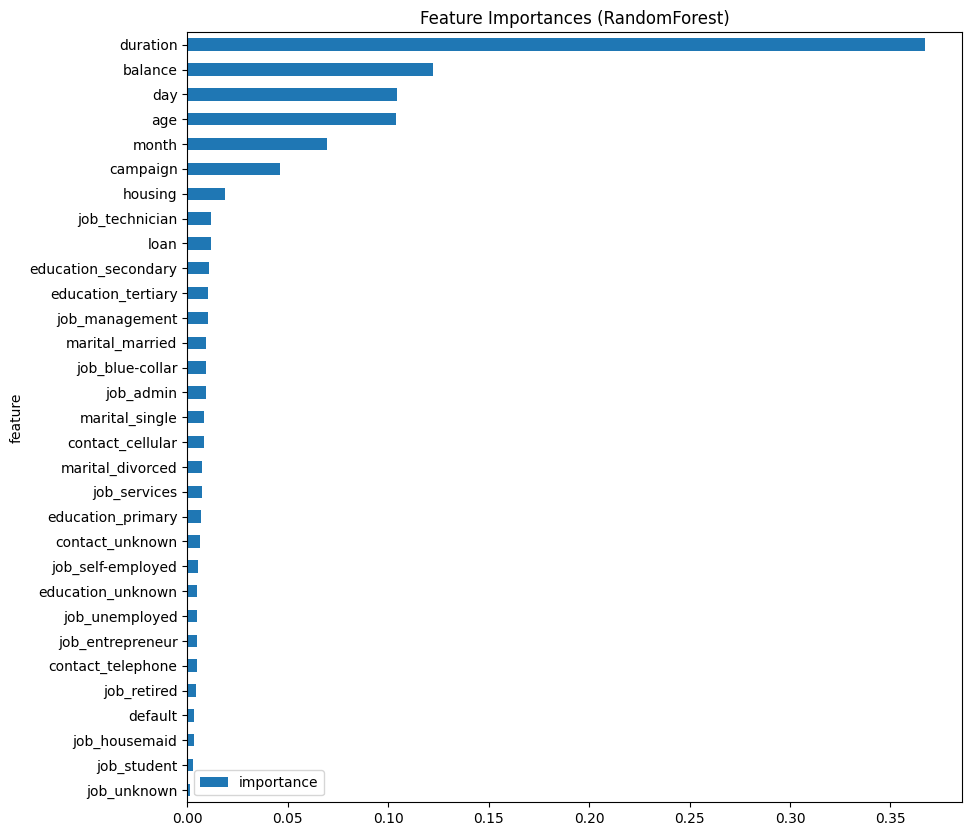

In [109]:
#Selecting RF classifier for feature importance as it offered the best accurancy
rf = RandomForestClassifier(random_state=seed)
rf.fit(X_train,y_train)
importances = rf.feature_importances_
feature_df = pd.DataFrame({'feature':dataset_encoded.drop(['y'], axis=1).columns, 'importance':importances})

feature_df.sort_values('importance').plot.barh(y='importance', x='feature', figsize=(10,10))
plt.title('Feature Importances (RandomForest)')

print(feature_df.sort_values('importance', ascending=False))

#### What makes the customers buy? Tell us which feature we should be focusing more on.

- Based on the insights provided by the plot and table above, it is evident that "Duration" stands out as a crucial feature for predicting customer outcomes. The following closely followed in importance are "Balance," "Day," and "Age."
- When prioritizing the focus on these features, it is advisable to start with "Duration" - the duration of calls made to the customer. Subsequently, "Balance," representing the average yearly balance, should receive attention. Additionally, the day of the month on which the customer is contacted and the customer's age are also significant and warrant focus in that order.

#### SHAP for Feature Importance:

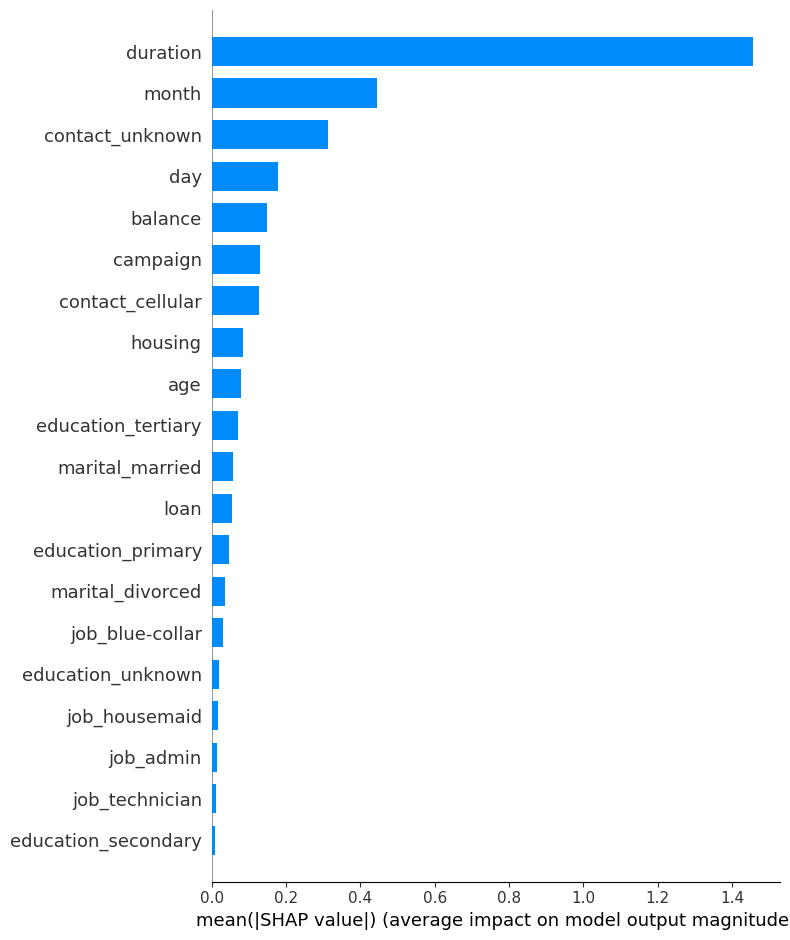

In [110]:
import shap

model = LGBMClassifier(random_state=seed)
model.fit(X_train, y_train)

# Create a SHAP explainer
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=dataset_encoded.drop(columns=['y']).columns,plot_type='bar')

#### Observations:
- Expanding on the previous explanation about feature importance, SHAP values provide more detailed insights into the factors that influence a customer's decision to subscribe to a term deposit.

- Positive Contributing Features: The SHAP plot displayed here focuses exclusively on the features that have a positive impact on predicting the customer's outcome. These are the factors that lead to higher chances of a customer subscribing to a term deposit.
- Duration of Calls: Similar to the previous analysis, this SHAP value plot reaffirms that the duration of calls is a critical factor in achieving a positive customer outcome. It's noteworthy that longer call durations contribute even more significantly to the likelihood of a positive customer outcome, as indicated by the prominent red highlights.
- Month: the month in which the customer is contacted is also significant and warrants focus in that order.
- Contact with Unknown Parties: Another key feature insight is that the "contact_unknown" feature is also the most important factor influencing a positive model output. This suggests that communicating with unknown contacts is associated with an increased likelihood of customer subscriptions. In other words, reaching out to new or previously uncontacted customers appears to be beneficial for achieving positive outcomes.
Note: It's important to note that the observations from the SHAP values are limited due to the data used for generating them. The SHAP values were computed based on the test data split, and the analysis focused exclusively on positive outcomes. Therefore, these insights provide valuable information, but they should be interpreted within the context of the specific dataset and analysis conducted

### Part 3 - Customer Segmentation

In [1]:
#!pip install seaborn
#!pip install umap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [23]:
dataset = pd.read_csv('term-deposit-marketing-2020.csv')
dataset.head()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset['default'] = le.fit_transform(dataset['default'])  # Assumes values are 'yes' and 'no'
dataset['housing'] = le.fit_transform(dataset['housing']) 
dataset['loan'] = le.fit_transform(dataset['loan']) 
dataset['y'] = le.fit_transform(dataset['y']) 

dataset_encoded = pd.get_dummies(dataset, columns=['job'], prefix='job')
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['marital'], prefix='marital')
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['education'], prefix='education')
dataset_encoded = pd.get_dummies(dataset_encoded, columns=['contact'], prefix='contact')

month_dict = {
    'jan': 1, 'feb': 2, 'mar': 3,
    'apr': 4, 'may': 5, 'jun': 6,
    'jul': 7, 'aug': 8, 'sep': 9,
    'oct': 10, 'nov': 11, 'dec': 12
}
dataset_encoded['month'] = dataset['month'].str.lower().replace(month_dict)

dataset_encoded = dataset_encoded.astype(int)
dataset_encoded.head()

,age,default,balance,housing,loan,day,month,duration,campaign,y,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown
0,58,0,2143,1,0,5,5,261,1,0,...,0,1,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,5,151,1,0,...,0,0,1,0,1,0,0,0,0,1
2,33,0,2,1,1,5,5,76,1,0,...,0,1,0,0,1,0,0,0,0,1
3,47,0,1506,1,0,5,5,92,1,0,...,0,1,0,0,0,0,1,0,0,1
4,33,0,1,0,0,5,5,198,1,0,...,0,0,1,0,0,0,1,0,0,1


In [3]:
dataset_encoded['y'].value_counts()

y
0    37104
1     2896
Name: count, dtype: int64

In [4]:
# Separate features and target
X = dataset_encoded.drop(columns=['y']).values
Y = dataset_encoded['y'].values

In [7]:
# Filter out only subscribers
subscribers = dataset_encoded[dataset_encoded['y'] == 1]
X_subscribers = subscribers.drop(columns=['y']).values
seed=6666

- K-Means: Randomly initializes k centroids and iteratively assigns data points to the nearest centroid.
- Hierarchical: Creates a hierarchy of clusters, starting with each data point as a separate cluster and merging them based on similarity.

#### Task 1: Use the Elbow Visualizer to Determine Optimal K for K-means Clustering

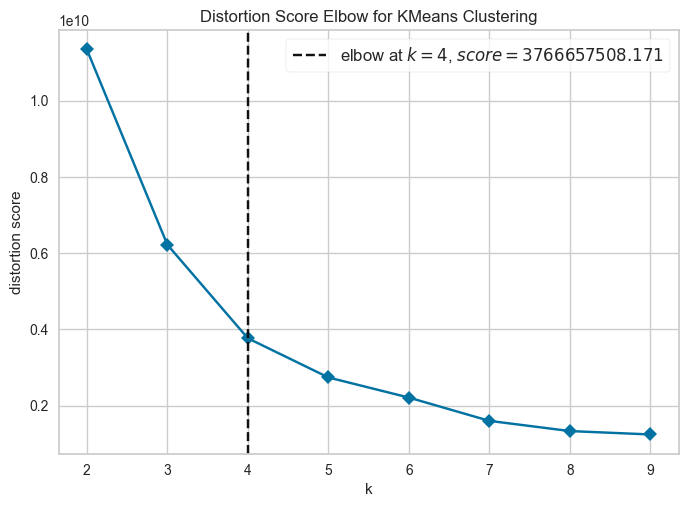

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Select features for clustering
X_subscribers = dataset_encoded[dataset_encoded['y'] == 1].drop(columns=['y']).values

# Instantiate the clustering model
model = KMeans(random_state=seed)

# Instantiate the KElbowVisualizer with the number of clusters and the metric
visualizer = KElbowVisualizer(model, k=(2,10), metric='distortion', timings=False)

# Fit the visualizer
visualizer.fit(X_subscribers)
visualizer.show()

#### Task 2: Use Silhouette Score Method to Determine Number of Clusters and Visualize

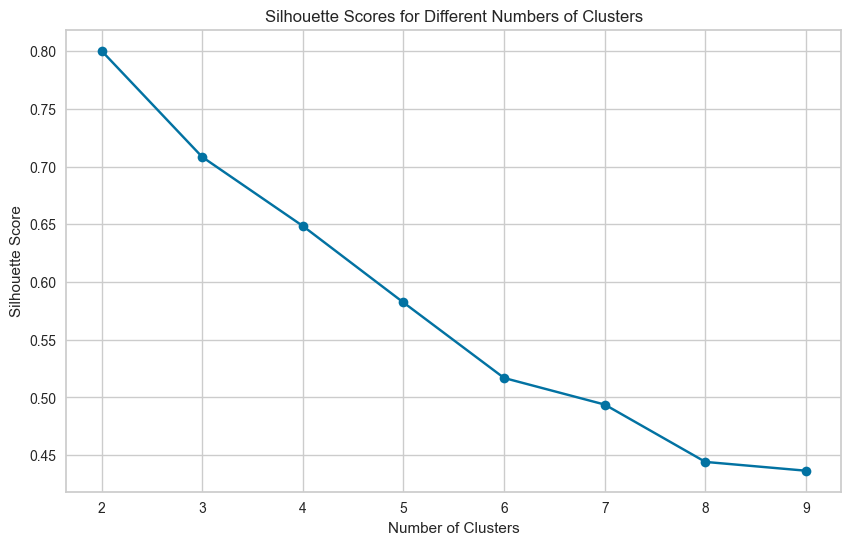

In [9]:
from sklearn.metrics import silhouette_score
import numpy as np

# Test a range of cluster numbers to find the best silhouette score
silhouette_scores = []
K_range = range(2, 10)

for K in K_range:
    kmeans = KMeans(n_clusters=K, random_state=seed)
    kmeans.fit(X_subscribers)
    score = silhouette_score(X_subscribers, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting silhouette scores
plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

- Given both analyses, k=4 appears to be a reasonable choice. It's the point where the elbow method shows a natural bend, suggesting a good balance between cluster compactness and number of clusters. Additionally, the silhouette score remains relatively high for 4 clusters compared to higher numbers, indicating decent cluster quality.

### K-Means Clustering

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=seed)
kmeans_labels = kmeans.fit_predict(X_subscribers)

### Hierarchical Clustering

In [11]:
linked = linkage(X_subscribers, 'ward')
hierarchical_labels = fcluster(linked, t=4, criterion='maxclust')-1 # Align labels with K-Means

### Dimensionality Reduction with PCA

In [12]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_subscribers)

### Visualization with t-SNE

In [13]:
tsne = TSNE(n_components=2, random_state=seed)
X_tsne = tsne.fit_transform(X_subscribers)

### Visualization with UMAP

In [14]:
#!pip install umap-learn

In [14]:
import umap.umap_ as umap

In [16]:
import warnings
warnings.filterwarnings('ignore')
umap_model = umap.UMAP(n_components=2, random_state=seed)
X_umap = umap_model.fit_transform(X_subscribers)

- PCA: Linear, good for understanding variance, computationally efficient, and interpretable. It’s less effective at capturing complex structures.
- t-SNE: Non-linear, excels at local structure preservation, creates visually appealing clusters but can be computationally expensive and sometimes distorts global structure.
- UMAP: Non-linear, balances local and global structure preservation, more scalable and faster than t-SNE, and often provides clearer visualizations for clusters.

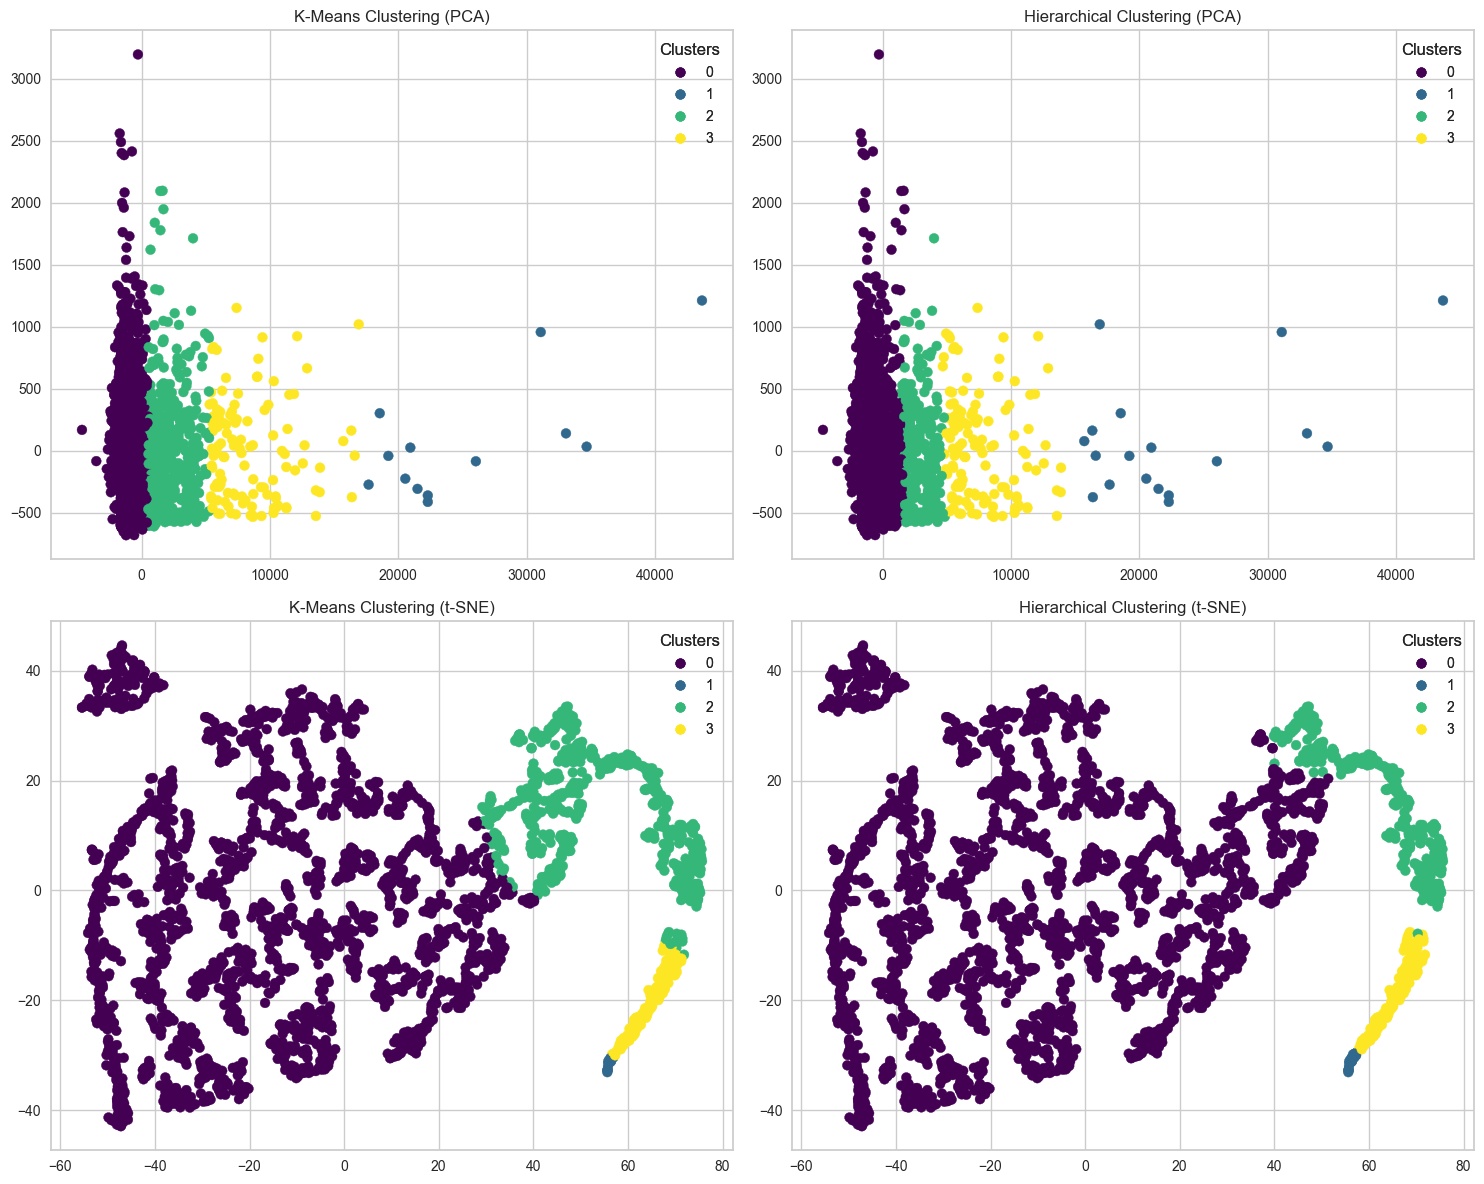

In [17]:
# Plotting results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# K-Means Clustering with PCA
scatter = axes[0, 0].scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', s=50)
axes[0, 0].set_title('K-Means Clustering (PCA)')
legend1 = axes[0, 0].legend(*scatter.legend_elements(), title="Clusters")
axes[0, 0].add_artist(legend1)

# Hierarchical Clustering with PCA
scatter = axes[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], c=hierarchical_labels, cmap='viridis', s=50)
axes[0, 1].set_title('Hierarchical Clustering (PCA)')
legend2 = axes[0, 1].legend(*scatter.legend_elements(), title="Clusters")
axes[0, 1].add_artist(legend2)

# K-Means Clustering with t-SNE
scatter = axes[1, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], c=kmeans_labels, cmap='viridis', s=50)
axes[1, 0].set_title('K-Means Clustering (t-SNE)')
legend3 = axes[1, 0].legend(*scatter.legend_elements(), title="Clusters")
axes[1, 0].add_artist(legend3)

# Hierarchical Clustering with t-SNE
scatter = axes[1, 1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=hierarchical_labels, cmap='viridis', s=50)
axes[1, 1].set_title('Hierarchical Clustering (t-SNE)')
legend4 = axes[1, 1].legend(*scatter.legend_elements(), title="Clusters")
axes[1, 1].add_artist(legend4)

plt.tight_layout()
plt.show()

#### Insights:
- Subscriber Segments: Based on the clustering results, it appears that there might be distinct segments of subscribers.
- Dimensionality Reduction: Both PCA and t-SNE provide valuable insights, but t-SNE might be more suitable for revealing complex patterns in your data.

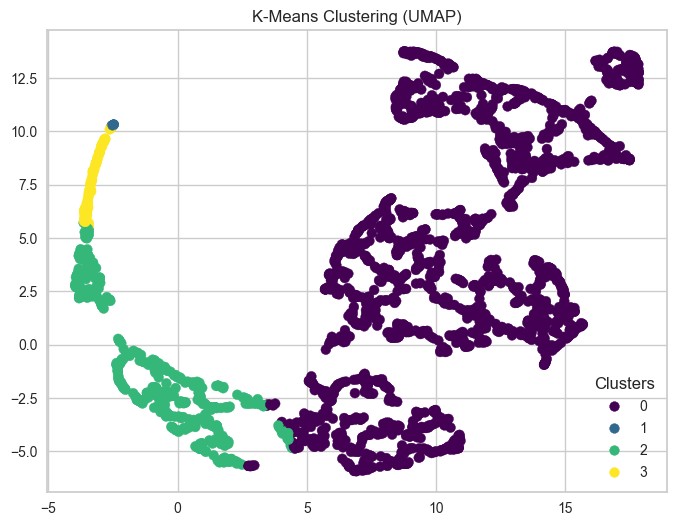

In [18]:
# Plot UMAP results for K-Means
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title('K-Means Clustering (UMAP)')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

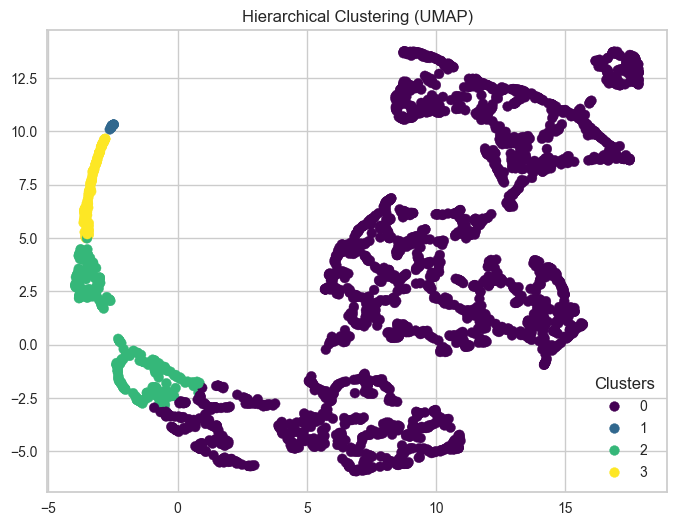

In [19]:
# Plot UMAP results for Hierarchical Clustering
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=hierarchical_labels, cmap='viridis', s=50)
plt.title('Hierarchical Clustering (UMAP)')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

#### Insights:
- Distinct Clusters: The plot shows clear separation between the clusters, suggesting that the data can be divided into distinct segments.
- Cluster Structure: The clusters have a somewhat elongated shape, indicating that there might be a gradient or continuum within the segments.
- Outlier: The small, isolated group of points in the upper left corner might represent outliers or a unique segment.

In [20]:
# Count subscribers in each segment for K-Means and Hierarchical Clustering
def count_segments(labels, segment_prefix):
    unique_labels, counts = np.unique(labels, return_counts=True)
    print(f"Counts for {segment_prefix} Clustering:")
    for label, count in zip(unique_labels, counts):
        print(f"Segment {label}: {count} subscribers")

In [21]:
count_segments(kmeans_labels, "K-Means")
count_segments(hierarchical_labels, "Hierarchical")

Counts for K-Means Clustering:
Segment 0: 2233 subscribers
Segment 1: 13 subscribers
Segment 2: 536 subscribers
Segment 3: 114 subscribers
Counts for Hierarchical Clustering:
Segment 0: 2462 subscribers
Segment 1: 18 subscribers
Segment 2: 293 subscribers
Segment 3: 123 subscribers


### Summary of Segments
#### 1. K-Means Clustering:

- Segment 0: 2,233 subscribers, which constitutes about 79.3% of the total subscribers.
- Segment 1: 13 subscribers, making up about 0.5% of the subscribers.
- Segment 2: 536 subscribers, representing approximately 19.1% of the total subscribers.
- Segment 3: 114 subscribers, or roughly 4.1% of the subscribers.

#### 2. Hierarchical Clustering:

- Segment 0: 2,462 subscribers, amounting to about 84.8% of the subscribers.
- Segment 1: 18 subscribers, accounting for 0.6% of the subscribers.
- Segment 2: 293 subscribers, which is about 10.1% of the total subscribers.
- Segment 3: 123 subscribers, making up approximately 4.2% of the subscribers. 

### Conclusion
#### 1. For K-Means Clustering 
- Segment 0 is dominant, comprising 79.3% of subscribers, and should be the main focus for broad strategies. Segment 2 represents 19.1% and is a viable target for specialized campaigns. Segment 1 and Segment 3, due to their small sizes, warrant further analysis to uncover unique characteristics or needs.

#### 2. For Hierarchical Clustering
- Segment 0 is the largest at 84.8%, indicating it should be prioritized in marketing efforts. Segment 2 and Segment 3, with 10.1% and 4.2% of subscribers respectively, could be explored for targeted initiatives. Segment 1 appears to be an outlier or niche group, suggesting a need for deeper understanding or possible exclusion from general strategies.


#### Task 3: Common Attributes Analysis for Subscribers in Clusters

In [27]:
# Assuming optimal clusters are selected based on previous analysis
optimal_K = visualizer.elbow_value_  # This takes the elbow value from the Elbow Visualizer
kmeans = KMeans(n_clusters=optimal_K, random_state=seed)
subscriber_labels = kmeans.fit_predict(X_subscribers)

# Create a DataFrame from cluster data
subscriber_data = dataset_encoded[dataset_encoded['y'] == 1]
subscriber_data['Cluster'] = subscriber_labels

#### Implementing ANOVA in Python to determine which attributes impact cluster assignment:

In [36]:
import pandas as pd
import numpy as np
from scipy.stats import f_oneway

# Assuming subscriber_data is your DataFrame and it includes the cluster labels
def anova_test(data, clusters, attributes):
    results = {}
    for attr in attributes:
        group_data = [data[data['Cluster'] == k][attr].dropna() for k in np.unique(data['Cluster'])]
        f_val, p_val = f_oneway(*group_data)
        results[attr] = {'F-Value': f_val, 'P-Value': p_val}

    return pd.DataFrame(results).T

attributes = ['duration', 'month', 'contact_unknown', 'day', 'balance', 'campaign']  # Example attributes
anova_results = anova_test(subscriber_data, 'Cluster', attributes)

# Display the results sorted by F-Value
print(anova_results.sort_values(by='F-Value', ascending=False))


                     F-Value   P-Value
balance          6428.792250  0.000000
month               6.030463  0.000432
duration            3.504624  0.014784
contact_unknown     2.543507  0.054510
campaign            0.718041  0.541127
day                 0.377673  0.769116


- High F-Value and Low P-Value: Attributes with a high F-value and a low P-value (typically <0.05) are considered statistically significant in differentiating between clusters.

- Based on the ANOVA results, it looks like balance, month, and duration are statistically significant attributes with P-values suggesting strong evidence against the null hypothesis (i.e., that group means are equal across clusters). contact_unknown is on the border with a P-value just above 0.05, indicating it might also have some impact but less so than the others.

In [41]:
subscriber_data.head()

,age,default,balance,housing,loan,day,month,duration,campaign,y,...,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,contact_cellular,contact_telephone,contact_unknown,Cluster
83,59,0,2343,1,0,5,5,1042,1,1,...,1,0,0,1,0,0,0,0,1,2
86,56,0,45,0,0,5,5,1467,1,1,...,1,0,0,1,0,0,0,0,1,0
87,41,0,1270,1,0,5,5,1389,1,1,...,1,0,0,1,0,0,0,0,1,0
129,55,0,2476,1,0,5,5,579,1,1,...,1,0,0,1,0,0,0,0,1,2
168,54,0,184,0,0,5,5,673,2,1,...,1,0,0,0,1,0,0,0,1,0


In [43]:
# Assuming 'subscriber_data' is your DataFrame
subscriber_data.to_csv('your_data.csv', index=False)